# 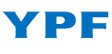
#   **Proyecto 4x4: Primer Pilar Vaca Muerta a corto plazo**  


El siguiente proyecto está focalizado en predecir el comportamiento de variables endógenas que impactan al actual modelo de YPF, en el marco del proyecto 4x4 de YPF. El proyecto consta en cuadriplicar el crecimiento de la empresa en los próximos 4 años a través de la expansión de la producción, eficiencia en los procesos y mayor foco en la generación de valor.


El proyecto va a constar del siguiente procedimiento de análisis:


1.  Recolección de Datos
2.  Exploración y Procesamiento de los datos (exploración de los datos, discreción de variables, normalización, limpieza, visualización previa)
3.  Modelado (construir y testear modelos para predecir o clasificar información o encontrar patrones de datos)
4.  Puesta en Producción (predecir nuevos datos, comunicar los resultados, integrar los resultados con aplicación)



# Recolección de datos

Importo todas las libreras necesarias para la recolección de datos y el análisis exploratorio.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Este dataset que se incorpora es de producción de pozos de gas (Mm3) y petroleo (m3) no convencional, el mismo se obtuvo desde la página de Secretaría de Energía (http://datos.energia.gob.ar/dataset/produccion-de-petroleo-y-gas-por-pozo/archivo)

In [ ]:
#Se utilizo la función usecols para extraer las features mas reelevantes del dataset
produccion = pd.read_csv('/content/produccion.zip', usecols=['anio','mes','idpozo','empresa','tipopozo','tipoestado','prod_gas','prod_pet','profundidad','areayacimiento','cuenca','provincia','tipo_de_recurso','sub_tipo_recurso','prod_agua','tipoextraccion','profundidad','areapermisoconcesion','coordenadax','coordenaday','proyecto','clasificacion','subclasificacion'])
produccion

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,tipoextraccion,tipoestado,tipopozo,empresa,...,areayacimiento,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso
0,2018,1,132488,0.000000,171.937000,0.000000,Surgencia Natural,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.864960,-39.016722,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
1,2017,1,130021,0.000000,245.850000,16.680000,Plunger Lift,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,ANTICLINAL CAMPAMENTO SUR,NEUQUINA,Neuquén,-69.733102,-39.024859,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
2,2018,1,132487,0.000000,514.696000,17.000000,Surgencia Natural,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.837875,-39.019313,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT
3,2015,1,137212,0.000000,422.110000,0.000000,Bombeo Mecánico,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,GUANACO,NEUQUINA,Neuquén,-69.255971,-38.860779,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
4,2018,1,132361,0.000000,217.103000,7.300000,Surgencia Natural,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,GUANACO,NEUQUINA,Neuquén,-69.231360,-38.869270,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345377,2024,12,3640,14.049906,17.378994,72.385001,Bombeo Mecánico,Extracción Efectiva,Petrolífero,Petrolera Aconcagua Energia S.A.,...,EL CARACOL,NEUQUINA,Neuquén,-68.452390,-37.954170,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,SHALE
345378,2023,12,164872,0.000000,0.000000,0.000000,NaN,NaN,NaN,Petrolera Aconcagua Energia S.A.,...,CHARCO BAYO,NEUQUINA,Rio Negro,-68.099940,-38.174340,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT
345379,2024,12,164374,60.960855,602.844409,63.852351,Surgencia Natural,Extracción Efectiva,Petrolífero,Petrolera Aconcagua Energia S.A.,...,CHARCO BAYO,NEUQUINA,Rio Negro,-68.106619,-38.178494,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT
345380,2024,12,164873,0.000000,0.000000,0.000000,Surgencia Natural,Parado Transitoriamente,Gasífero,Petrolera Aconcagua Energia S.A.,...,CHARCO BAYO,NEUQUINA,Rio Negro,-68.129670,-38.149710,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT


En este paso, lo que realizamos es un filtro al dataset original para solo observar y analizar la información relacionada a la compañía YPF S.A. en la cuenca Neuquina a partir del año 2023 inclusive. Esta determinación viene aparejado con la línea de pensamiento del actual CEO de la compañía. Donde se tendrá en consideración como primer pilar para el crecimiento productivo la región de Vaca Muerta, es decir, centrar el análisis en la Cuenca Neuquina a partir del 2023, año en que asume el actual CEO.

In [ ]:
#Filtro por cada dataset solo los registros para YPF S.A., para la cuenca Neuquina y a partir del año 2023 inclusive
prod_ypf = produccion[(produccion['empresa'] == 'YPF S.A.')&(produccion['cuenca'] == 'NEUQUINA')&(produccion['anio']>2022)]

prod_ypf

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,tipoextraccion,tipoestado,tipopozo,empresa,...,areayacimiento,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso
8572,2025,1,153522,32.29,172.10,0.00,Plunger Lift,Extracción Efectiva,Gasífero,YPF S.A.,...,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.810843,-39.024083,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
8578,2025,1,156742,0.00,0.00,0.00,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,...,EL OREJANO,NEUQUINA,Neuquén,-69.179098,-38.009987,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8584,2025,1,156744,0.00,0.00,0.00,Bombeo Mecánico,En Estudio,Otro tipo,YPF S.A.,...,LA AMARGA CHICA,NEUQUINA,Neuquén,-68.748543,-38.176774,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8590,2025,1,155827,0.00,0.00,0.00,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,...,EL OREJANO,NEUQUINA,Neuquén,-69.200359,-37.958765,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8596,2025,1,156756,55.99,3.37,0.00,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA CAMPANA,NEUQUINA,Neuquén,-68.678007,-38.329983,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199438,2024,12,166128,0.00,0.00,0.00,Sin Sistema de Extracción,En Inyección Efectiva,Sumidero,YPF S.A.,...,LOMA COLORADA,NEUQUINA,Neuquén,-68.525949,-38.122077,NO CONVENCIONAL,Sin Proyecto,SERVICIO,CONTROL,SHALE
199440,2024,12,166126,1642.63,101.18,1102.79,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA COLORADA,NEUQUINA,Neuquén,-68.558082,-38.076855,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199442,2024,12,166127,2441.10,153.31,1287.65,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA COLORADA,NEUQUINA,Neuquén,-68.558013,-38.076854,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199446,2024,12,166133,0.00,0.00,0.00,Surgencia Natural,Parado Transitoriamente,Gasífero,YPF S.A.,...,LAS TACANAS,NEUQUINA,Neuquén,-69.335181,-38.710951,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE


In [ ]:
#Con rename se logró renombrar las columnas que tenían nombres abreviados o poco legibles
prod_ypf=prod_ypf.rename(columns={'anio':'Año','mes':'Mes','idpozo':'ID pozo','prod_pet':'Produccion de Petroleo','prod_gas':'Produccion de Gas','prod_agua':'Produccion de agua','tipoextraccion':'Tipo de extraccion','tipoestado':'Tipo de estado','tipopozo':'Tipo de pozo','empresa':'Empresa','profundidad':'Profundidad','areapermisoconcesion':'Area de permiso de concesion','cuenca':'Cuenca','provincia':'Provincia','tipo_de_recurso':'Tipo de recurso','proyecto':'Proyecto','clasificacion':'Clasificacion','subclasificacion':'Subclasificacion','sub_tipo_recurso':'Subtipo de recurso'})
prod_ypf

,Año,Mes,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,...,areayacimiento,Cuenca,Provincia,coordenadax,coordenaday,Tipo de recurso,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso
8572,2025,1,153522,32.29,172.10,0.00,Plunger Lift,Extracción Efectiva,Gasífero,YPF S.A.,...,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.810843,-39.024083,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
8578,2025,1,156742,0.00,0.00,0.00,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,...,EL OREJANO,NEUQUINA,Neuquén,-69.179098,-38.009987,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8584,2025,1,156744,0.00,0.00,0.00,Bombeo Mecánico,En Estudio,Otro tipo,YPF S.A.,...,LA AMARGA CHICA,NEUQUINA,Neuquén,-68.748543,-38.176774,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8590,2025,1,155827,0.00,0.00,0.00,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,...,EL OREJANO,NEUQUINA,Neuquén,-69.200359,-37.958765,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8596,2025,1,156756,55.99,3.37,0.00,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA CAMPANA,NEUQUINA,Neuquén,-68.678007,-38.329983,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199438,2024,12,166128,0.00,0.00,0.00,Sin Sistema de Extracción,En Inyección Efectiva,Sumidero,YPF S.A.,...,LOMA COLORADA,NEUQUINA,Neuquén,-68.525949,-38.122077,NO CONVENCIONAL,Sin Proyecto,SERVICIO,CONTROL,SHALE
199440,2024,12,166126,1642.63,101.18,1102.79,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA COLORADA,NEUQUINA,Neuquén,-68.558082,-38.076855,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199442,2024,12,166127,2441.10,153.31,1287.65,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA COLORADA,NEUQUINA,Neuquén,-68.558013,-38.076854,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199446,2024,12,166133,0.00,0.00,0.00,Surgencia Natural,Parado Transitoriamente,Gasífero,YPF S.A.,...,LAS TACANAS,NEUQUINA,Neuquén,-69.335181,-38.710951,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE


# Análisis exploratorio de datos

In [ ]:
#Vamos a ver que tipo de estructura tiene prod_ypf
type(prod_ypf)

pandas.core.frame.DataFrame

In [ ]:
#Con la función shape podemos ver cuantas features y registros contiene el dataframe prod_ypf
prod_ypf.shape

(56418, 22)

In [ ]:
#Con la función columns puedo visualizar los nombres de los features
prod_ypf.columns

Index(['Año', 'Mes', 'ID pozo', 'Produccion de Petroleo', 'Produccion de Gas',
       'Produccion de agua', 'Tipo de extraccion', 'Tipo de estado',
       'Tipo de pozo', 'Empresa', 'Profundidad',
       'Area de permiso de concesion', 'areayacimiento', 'Cuenca', 'Provincia',
       'coordenadax', 'coordenaday', 'Tipo de recurso', 'Proyecto',
       'Clasificacion', 'Subclasificacion', 'Subtipo de recurso'],
      dtype='object')

In [ ]:
#A través de la función head() puedo visualizar los primeros 5 registros
prod_ypf.head()

,Año,Mes,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,...,areayacimiento,Cuenca,Provincia,coordenadax,coordenaday,Tipo de recurso,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso
8572,2025,1,153522,32.29,172.10,0.0,Plunger Lift,Extracción Efectiva,Gasífero,YPF S.A.,...,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.810843,-39.024083,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
8578,2025,1,156742,0.00,0.00,0.0,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,...,EL OREJANO,NEUQUINA,Neuquén,-69.179098,-38.009987,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8584,2025,1,156744,0.00,0.00,0.0,Bombeo Mecánico,En Estudio,Otro tipo,YPF S.A.,...,LA AMARGA CHICA,NEUQUINA,Neuquén,-68.748543,-38.176774,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8590,2025,1,155827,0.00,0.00,0.0,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,...,EL OREJANO,NEUQUINA,Neuquén,-69.200359,-37.958765,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8596,2025,1,156756,55.99,3.37,0.0,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA CAMPANA,NEUQUINA,Neuquén,-68.678007,-38.329983,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE


In [ ]:
# Mientras que con la función tail(15) puedo visualizar los últimos 15 registros del dataframe
prod_ypf.tail(15)

,Año,Mes,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,...,areayacimiento,Cuenca,Provincia,coordenadax,coordenaday,Tipo de recurso,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso
199418,2024,12,165787,3409.13,645.07,1584.58,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,BANDURRIA SUR,NEUQUINA,Neuquén,-68.726359,-38.305617,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199420,2024,12,166130,5.33,4.13,569.26,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,BANDURRIA SUR,NEUQUINA,Neuquén,-68.880231,-38.238338,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199422,2024,12,165795,570.73,166.81,1241.24,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,BANDURRIA SUR,NEUQUINA,Neuquén,-68.705510,-38.313932,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199424,2024,12,165791,1523.42,445.38,2753.77,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,BANDURRIA SUR,NEUQUINA,Neuquén,-68.705921,-38.313933,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199426,2024,12,165794,3054.73,987.58,2708.32,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,BANDURRIA SUR,NEUQUINA,Neuquén,-68.705614,-38.313932,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199428,2024,12,165792,2967.65,980.35,2439.32,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,BANDURRIA SUR,NEUQUINA,Neuquén,-68.705819,-38.313933,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199430,2024,12,165793,1775.53,542.29,2729.50,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,BANDURRIA SUR,NEUQUINA,Neuquén,-68.705716,-38.313933,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199432,2024,12,166129,5.03,1.04,403.62,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,BANDURRIA SUR,NEUQUINA,Neuquén,-68.880333,-38.238338,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199434,2024,12,166125,3904.39,203.65,867.70,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA COLORADA,NEUQUINA,Neuquén,-68.558196,-38.076856,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199436,2024,12,166124,2543.15,168.20,950.83,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA COLORADA,NEUQUINA,Neuquén,-68.558310,-38.076856,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE


In [ ]:
# Con dtypes podemos visualizar los tipos de datos que contiene cada feature (enteros, flotantes y objetos)
prod_ypf.dtypes

,0
Año,int64
Mes,int64
ID pozo,int64
Produccion de Petroleo,float64
Produccion de Gas,float64
Produccion de agua,float64
Tipo de extraccion,object
Tipo de estado,object
Tipo de pozo,object
Empresa,object


In [ ]:
# Ahora nos interesa ver cuantos son los datos faltantes por cada feature, en este caso no tenemos datos Nan
datosfaltantes = prod_ypf.isnull().sum()
print (datosfaltantes)

Año                             0
Mes                             0
ID pozo                         0
Produccion de Petroleo          0
Produccion de Gas               0
Produccion de agua              0
Tipo de extraccion              0
Tipo de estado                  0
Tipo de pozo                    0
Empresa                         0
Profundidad                     0
Area de permiso de concesion    0
areayacimiento                  0
Cuenca                          0
Provincia                       0
coordenadax                     0
coordenaday                     0
Tipo de recurso                 0
Proyecto                        0
Clasificacion                   0
Subclasificacion                0
Subtipo de recurso              0
dtype: int64


In [ ]:
#convertir en entero la produccion de petroleo, produccion de gas, produccion de agua y profundidad

prod_ypf['Produccion de Petroleo'] = prod_ypf['Produccion de Petroleo'].astype(int)
prod_ypf['Produccion de Gas'] = prod_ypf['Produccion de Gas'].astype(int)
prod_ypf['Produccion de agua'] = prod_ypf['Produccion de agua'].astype(int)
prod_ypf['Profundidad'] = prod_ypf['Profundidad'].astype(int)

prod_ypf.dtypes

,0
Año,int64
Mes,int64
ID pozo,int64
Produccion de Petroleo,int64
Produccion de Gas,int64
Produccion de agua,int64
Tipo de extraccion,object
Tipo de estado,object
Tipo de pozo,object
Empresa,object


In [ ]:
prod_ypf.head() #definitivamente podemos observar que dichas columnas tienen observaciones en números enteros

,Año,Mes,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,...,areayacimiento,Cuenca,Provincia,coordenadax,coordenaday,Tipo de recurso,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso
8572,2025,1,153522,32,172,0,Plunger Lift,Extracción Efectiva,Gasífero,YPF S.A.,...,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.810843,-39.024083,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
8578,2025,1,156742,0,0,0,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,...,EL OREJANO,NEUQUINA,Neuquén,-69.179098,-38.009987,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8584,2025,1,156744,0,0,0,Bombeo Mecánico,En Estudio,Otro tipo,YPF S.A.,...,LA AMARGA CHICA,NEUQUINA,Neuquén,-68.748543,-38.176774,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8590,2025,1,155827,0,0,0,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,...,EL OREJANO,NEUQUINA,Neuquén,-69.200359,-37.958765,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8596,2025,1,156756,55,3,0,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA CAMPANA,NEUQUINA,Neuquén,-68.678007,-38.329983,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE


Aplicamos la función describe, pero como se puede observar, por ejemplo, la media es muy baja para la sumatoria del total de producción para el caso de petróleo y agua, que es el dato más relevante que nos va a importar durante todo el proyecto. Esto suele suceder en datasets operativos que: pozos que no estan activos ese mes/año, registros de producción con mantenimiento o cierre, o pozos nuevos que aún no se iniciaron.

In [ ]:
#Con la función describe puedo obtener todo lo relacionado a la estadística descriptiva (media, desvio estandar, mínimo, máximo, etc) para determinadas features
prod_ypf[['Produccion de Petroleo', 'Produccion de Gas', 'Produccion de agua', 'Profundidad']].describe().astype(int)

,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Profundidad
count,56418,56418,56418,56418
mean,474,341,187,4111
std,1087,1033,577,8018
min,0,0,0,0
25%,0,1,0,3042
50%,13,60,6,3838
75%,343,237,78,5145
max,10489,17143,24615,378939


In [ ]:
(prod_ypf['Produccion de Petroleo'] > 0).sum()

np.int64(35103)

In [ ]:
prod_ypf[prod_ypf['Produccion de Petroleo'] > 0]['Produccion de Petroleo'].mean().astype(int)

np.int64(763)

In [ ]:
(prod_ypf['Produccion de Gas'] > 0).sum()

np.int64(42697)

In [ ]:
prod_ypf[prod_ypf['Produccion de Gas'] > 0]['Produccion de Gas'].mean().astype(int)

np.int64(451)

In [ ]:
(prod_ypf['Produccion de agua'] > 0).sum()

np.int64(34266)

In [ ]:
prod_ypf[prod_ypf['Produccion de agua'] > 0]['Produccion de agua'].mean().astype(int)

np.int64(308)

In [ ]:
(prod_ypf['Profundidad'] > 0).sum()

np.int64(55159)

In [ ]:
prod_ypf[prod_ypf['Profundidad'] > 0]['Profundidad'].mean().astype(int)

np.int64(4205)

Para lo siguiente tratamos de buscar la media de la producción de petróleo y gas por cada año a partir del 2023 hasta el 2025 inclusive.

# Analizamos Producción de Petroleo

In [ ]:
sorted(prod_ypf['Tipo de extraccion'].unique()) #Para ver las categorías que tengo en la feature Tipo de extracción

['Bombeo Mecánico',
 'Electrosumergible',
 'Gas Lift',
 'Plunger Lift',
 'Sin Sistema de Extracción',
 'Surgencia Natural']

In [ ]:
sorted(prod_ypf['areayacimiento'].unique())#Para ver las categorías que tengo en la feature Área de yacimiento en la cuenca Neuquina

['AGUADA DE LA ARENA',
 'BAJO DEL TORO',
 'BAJO DEL TORO NORTE',
 'BANDURRIA SUR',
 'BARDA GONZALEZ',
 'BARREALES COLORADOS',
 'BARROSA NORTE',
 'CAMPAMENTO DOS',
 'CERRO ARENA',
 'CERRO LAS MINAS',
 'CERRO MANRIQUE',
 'CHIHUIDO DE LA SIERRA NEGRA',
 'CN VII A',
 'CUPEN',
 'CUPEN MAHUIDA',
 'EL CORDON OESTE',
 'EL OREJANO',
 'EL TRIANGULO',
 'ESTACION FERNANDEZ ORO',
 'FILO MORADO',
 'GUANACO',
 'HUINCUL',
 'LA AMARGA CHICA',
 'LA ANGOSTURA SUR I',
 'LA ANGOSTURA SUR II',
 'LA RIBERA BLOQUE I',
 'LA RIBERA BLOQUE II',
 'LAS MANADAS',
 'LAS TACANAS',
 'LOMA AMARILLA SUR',
 'LOMA CAMPANA',
 'LOMA CAMPANA-LLL',
 'LOMA COLORADA',
 'LOMA DEL MOLLE',
 'LOMA LA LATA',
 'LOS CALDENES',
 'MALAL DEL MEDIO',
 'NARAMBUENA',
 'NORTE DEL OCTOGONO',
 'PASO DE LAS BARDAS NORTE',
 'RINCON DE PIEDRA',
 'RINCON DEL MANGRULLO',
 'RIO NEUQUEN',
 'SIERRA BARROSA',
 'SIERRA BARROSA ESTE']

**Producción de Petróleo de las 10 áreas de yacimiento en el 2023**

El siguiente gráfico muestra la producción de petróleo (m3) de las 10 principales áreas de yacimiento de YPF en el 2023 en Vaca Muerta. Es importante detallar que la mayor cantidad producida está concentrada en 5 áreas, las mismas son La Amarga Chica, Loma Campana LLL, Bandurria Sur, Loma Campana y Loma colorada. La diferencia entre Loma Campana LLL y Loma Campana, simplemente radica en que la primera es el corazón del área de yacimiento.

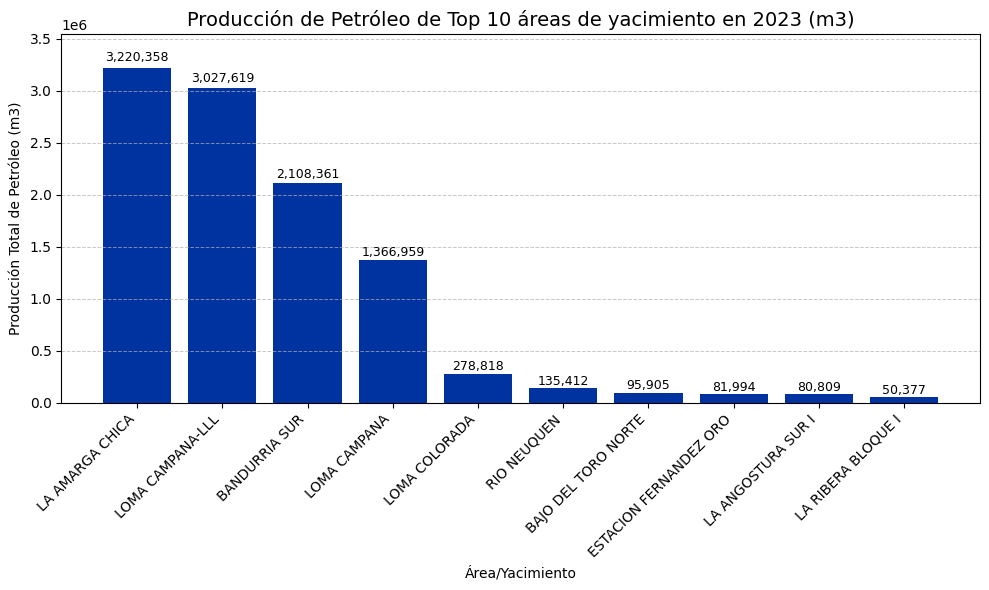

In [ ]:
# Filtrar por año 2023
df_2023 = prod_ypf[prod_ypf['Año'] == 2023]

# Agrupar y obtener top 10 yacimientos
top10_yacimientos = (
    df_2023.groupby('areayacimiento')['Produccion de Petroleo']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Crear gráfico
fig, ax = plt.subplots(figsize=(10,6))

ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

bars = ax.bar(top10_yacimientos.index, top10_yacimientos.values, color='#0033A0')

ax.set_title('Producción de Petróleo de Top 10 áreas de yacimiento en 2023 (m3)', fontsize=14)
ax.set_xlabel('Área/Yacimiento')
ax.set_ylabel('Producción Total de Petróleo (m3)')
ax.set_xticks(range(len(top10_yacimientos.index)))
ax.set_xticklabels(top10_yacimientos.index, rotation=45, ha='right')

ax.set_ylim(0, top10_yacimientos.values.max() * 1.1)

# Etiquetas arriba de las barras
for bar in bars:
    yval = int(bar.get_height())
    ax.text(bar.get_x() + bar.get_width()/2, yval + yval*0.01, f'{yval:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


**Producción mensual de petróleo en 2023 en m3 (Top 5 áreas)**

El gráfico presenta la evolución mensual de la producción de petróleo en metros cúbicos (m³) durante 2023 en las cinco principales áreas de Vaca Muerta. Se destacan LA AMARGA CHICA y LOMA CAMPANA-LLL como las líderes de producción, con valores mensuales que superan consistentemente los 240.000 m³, y alcanzan picos superiores a los 300.000 m³ hacia fin de año.

BANDURRIA SUR muestra un crecimiento sostenido a lo largo del año, pasando de 146.000 m³ en enero a casi 249.000 m³ en diciembre, reflejando un fuerte impulso productivo.

En contraste, LOMA CAMPANA exhibe una tendencia más estable pero decreciente, mientras que LOMA COLORADA, aunque con volúmenes mucho menores, evidencia un repunte en los últimos meses del año tras una caída abrupta en septiembre.

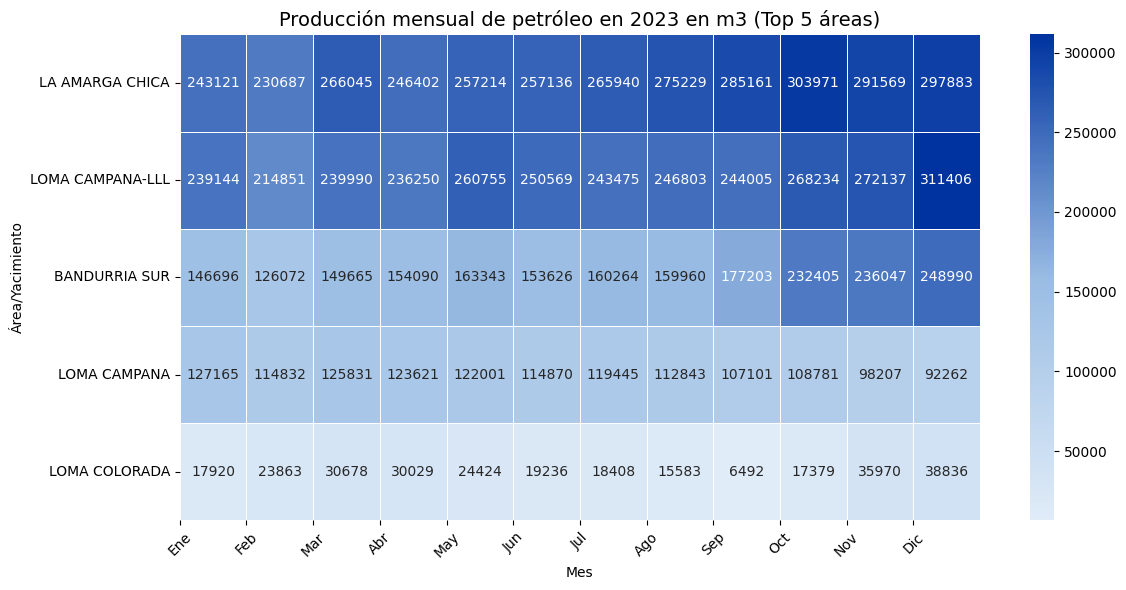

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Paso 1: Filtrar por año 2023
df_2023 = prod_ypf[prod_ypf['Año'] == 2023]

# Paso 2: Obtener las Top 10 áreas/yacimientos por producción total
top10_yacimientos = (
    df_2023.groupby('areayacimiento')['Produccion de Petroleo']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Paso 3: Seleccionar las Top 5 áreas
top5_areas = top10_yacimientos.head(5).index

# Paso 4: Filtrar el DataFrame para las Top 5 áreas
df_top5 = df_2023[df_2023['areayacimiento'].isin(top5_areas)]

# Paso 5: (Opcional) Crear columna 'Mes' si no existe
# df_top5['Mes'] = pd.to_datetime(df_top5['Fecha']).dt.month  # Descomentar si es necesario

# Paso 6: Agrupar por área y mes, sumar la producción
produccion_mensual = (
    df_top5
    .groupby(['areayacimiento', 'Mes'])['Produccion de Petroleo']
    .sum()
    .unstack(fill_value=0)
)

# Paso 7: Reordenar las filas por producción total anual (de mayor a menor)
orden_areas = produccion_mensual.sum(axis=1).sort_values(ascending=False).index
produccion_mensual = produccion_mensual.loc[orden_areas]

# Paso 8: Crear paleta de colores personalizada con azul YPF
ypf_blues = LinearSegmentedColormap.from_list("ypf_blues", ["#e0ecf8", "#99bce3", "#0033A0"])

# Paso 9: Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(produccion_mensual, annot=True, fmt=".0f", cmap=ypf_blues, linewidths=.5)

plt.title("Producción mensual de petróleo en 2023 en m3 (Top 5 áreas)", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("Área/Yacimiento")
plt.xticks(
    ticks=range(12),
    labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'],
    rotation=45
)
plt.tight_layout()
plt.show()


**Producción de Petróleo de las 10 áreas de yacimiento en el 2024**

El siguiente gráfico muestra la producción de petróleo (m3) de las 10 principales áreas de yacimiento de YPF en el 2024 en Vaca Muerta. Es importante detallar que la mayor cantidad producida está concentrada en 5 áreas, las mismas son La Amarga Chica, Loma Campana LLL, Bandurria Sur, Loma Campana y Loma colorada. Sin embargo, existe una mínima diferencia en cuanto al nivel productivo de esta última, Loma Colorada, que aumentó su producción de petróleo superir al 100% respecto del año anterior.

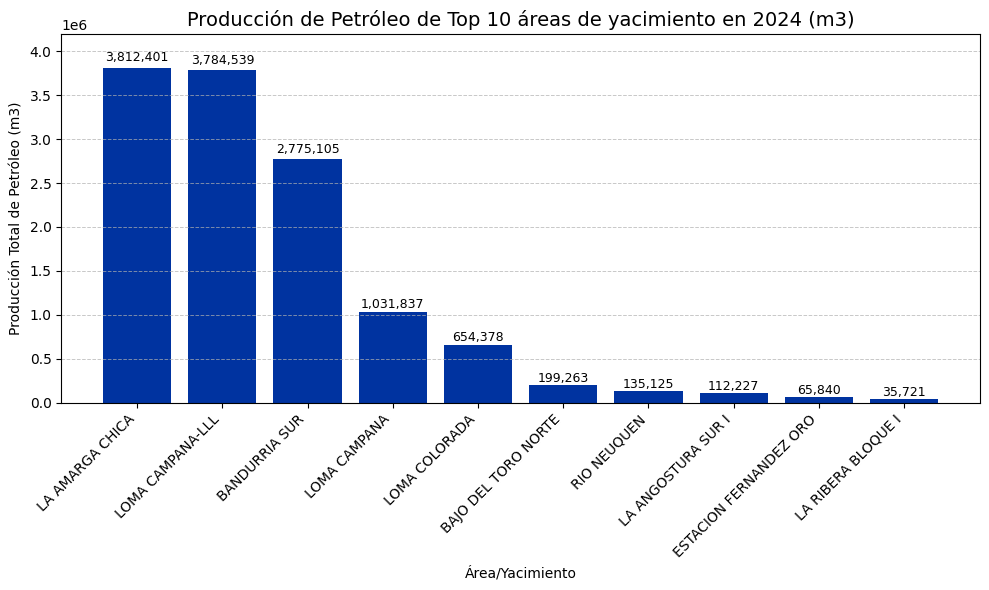

In [ ]:
# Filtrar por año 2024
df_2024 = prod_ypf[prod_ypf['Año'] == 2024]

# Agrupar y obtener top 10 yacimientos
top10_yacimientos_2024 = (
    df_2024.groupby('areayacimiento')['Produccion de Petroleo']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Crear gráfico
fig, ax = plt.subplots(figsize=(10,6))

ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

bars = ax.bar(top10_yacimientos_2024.index, top10_yacimientos_2024.values, color='#0033A0')

ax.set_title('Producción de Petróleo de Top 10 áreas de yacimiento en 2024 (m3)', fontsize=14)
ax.set_xlabel('Área/Yacimiento')
ax.set_ylabel('Producción Total de Petróleo (m3)')
ax.set_xticks(range(len(top10_yacimientos_2024.index)))
ax.set_xticklabels(top10_yacimientos_2024.index, rotation=45, ha='right')

ax.set_ylim(0, top10_yacimientos_2024.values.max() * 1.1)

# Etiquetas arriba de las barras
for bar in bars:
    yval = int(bar.get_height())
    ax.text(bar.get_x() + bar.get_width()/2, yval + yval*0.01, f'{yval:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**Producción mensual de petróleo en 2024 en m3 (Top 5 áreas)**

Durante 2024, la producción de petróleo en Vaca Muerta mostró una intensificación en los niveles operativos, con LOMA CAMPANA-LLL y LA AMARGA CHICA liderando de forma destacada. Ambas áreas superaron los 350.000 m³ hacia el final del año, marcando récords en diciembre. LOMA CAMPANA-LLL se mantuvo como la más productiva del año, con un leve descenso en el segundo trimestre, pero con una recuperación sostenida desde julio en adelante.

BANDURRIA SUR también tuvo una evolución notable: tras una caída durante el primer semestre, recuperó impulso y terminó diciembre con un fuerte incremento, alcanzando casi los 294.000 m³, su mayor registro del año.

En contraste, LOMA CAMPANA evidenció una baja sostenida, con cifras que cayeron por debajo de los 65.000 m³ en diciembre, indicando una posible reducción operativa o madurez del área.

Finalmente, LOMA COLORADA, aunque sigue siendo la de menor volumen, duplicó su producción respecto a 2023, destacándose un crecimiento progresivo hasta septiembre, lo que sugiere una expansión en su desarrollo.

El panorama general de 2024 refleja una consolidación de las áreas más productivas y una reconfiguración del mapa operativo, con algunos campos en declive y otros emergiendo con fuerza.

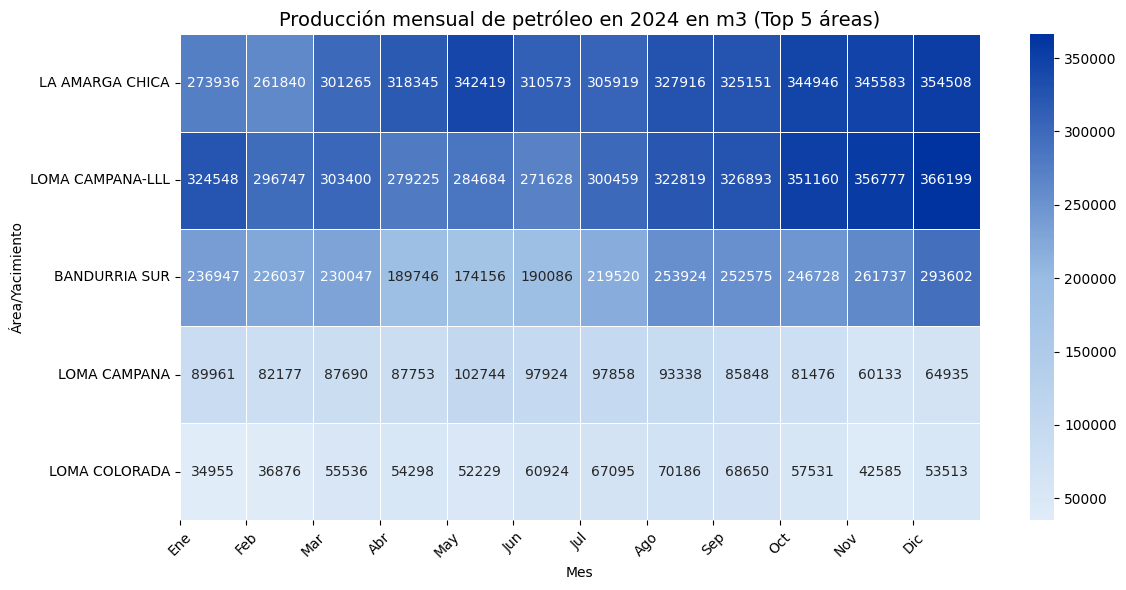

In [ ]:
# Paso 1: Filtrar por año 2024
df_2024 = prod_ypf[prod_ypf['Año'] == 2024]

# Paso 2: Obtener las Top 10 áreas/yacimientos por producción total
top10_yacimientos = (
    df_2024.groupby('areayacimiento')['Produccion de Petroleo']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Paso 3: Seleccionar las Top 5 áreas
top5_areas = top10_yacimientos.head(5).index

# Paso 4: Filtrar el DataFrame para las Top 5 áreas
df_top5 = df_2024[df_2024['areayacimiento'].isin(top5_areas)]

# Paso 5: (Opcional) Crear columna 'Mes' si no existe
# df_top5['Mes'] = pd.to_datetime(df_top5['Fecha']).dt.month  # Descomentar si es necesario

# Paso 6: Agrupar por área y mes, sumar la producción
produccion_mensual = (
    df_top5
    .groupby(['areayacimiento', 'Mes'])['Produccion de Petroleo']
    .sum()
    .unstack(fill_value=0)
)

# Paso 7: Reordenar las filas por producción total anual (de mayor a menor)
orden_areas = produccion_mensual.sum(axis=1).sort_values(ascending=False).index
produccion_mensual = produccion_mensual.loc[orden_areas]

# Paso 8: Crear paleta de colores personalizada con azul YPF
ypf_blues = LinearSegmentedColormap.from_list("ypf_blues", ["#e0ecf8", "#99bce3", "#0033A0"])

# Paso 9: Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(produccion_mensual, annot=True, fmt=".0f", cmap=ypf_blues, linewidths=.5)

plt.title("Producción mensual de petróleo en 2024 en m3 (Top 5 áreas)", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("Área/Yacimiento")
plt.xticks(
    ticks=range(12),
    labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'],
    rotation=45
)
plt.tight_layout()
plt.show()

**Participación de la producción de petróleo de las Top 5 áreas**

El siguiente gráfico circular muestra en detalle la representatividad que manifiesta las principales 5 áreas de yacimiento en relación a un año y el siguiente. Las áreas que mantuvieron su representatividad son La Amarga Chica y Loma Campana LLL, mientras que Bandurria Sur y Loma Colorada tuvieron un leve repunte de la producción de petróleo (m3) según los porcentajes observados.

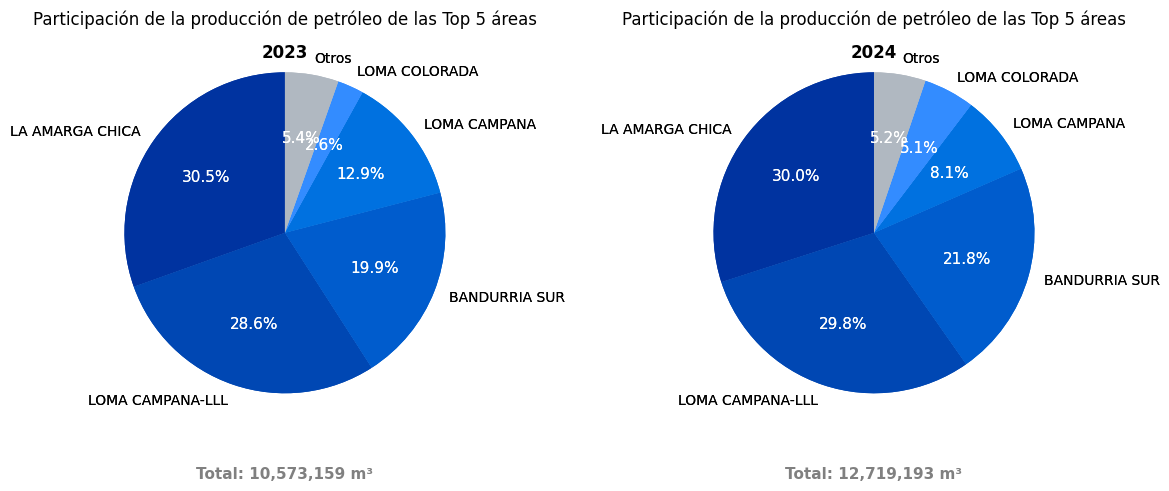

In [ ]:
def preparar_datos_porcentaje(df, año, columna_area, columna_valor, top_n=5):
    df_año = df[df['Año'] == año]
    suma_por_area = df_año.groupby(columna_area)[columna_valor].sum()
    top = suma_por_area.sort_values(ascending=False).head(top_n)
    otros = suma_por_area.sum() - top.sum()
    datos = pd.concat([top, pd.Series({'Otros': otros})])
    porcentaje = datos / datos.sum() * 100
    total_produccion = suma_por_area.sum()
    return porcentaje, total_produccion

# Paleta de azules YPF
colores_azules_ypf = ['#0033A0', '#0047B3', '#005CCD', '#0071E0', '#338CFF', '#B0B8C1']

porc_2023, total_2023 = preparar_datos_porcentaje(prod_ypf, 2023, 'areayacimiento', 'Produccion de Petroleo')
porc_2024, total_2024 = preparar_datos_porcentaje(prod_ypf, 2024, 'areayacimiento', 'Produccion de Petroleo')

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Gráfica 2023
axes[0].pie(porc_2023, labels=porc_2023.index, autopct='%1.1f%%', startangle=90, colors=colores_azules_ypf)
axes[0].set_title('Participación de la producción de petróleo de las Top 5 áreas', fontsize=12)
axes[0].text(0.5, 0.95, '2023', ha='center', va='center', fontsize=12, fontweight='bold', transform=axes[0].transAxes)
axes[0].text(0.5, -0.1, f'Total: {int(total_2023):,} m³', ha='center', va='center', fontsize=11, color='gray',fontweight='bold', transform=axes[0].transAxes)

# Gráfica 2024
axes[1].pie(porc_2024, labels=porc_2024.index, autopct='%1.1f%%', startangle=90, colors=colores_azules_ypf)
axes[1].set_title('Participación de la producción de petróleo de las Top 5 áreas', fontsize=12)
axes[1].text(0.5, 0.95, '2024', ha='center', va='center', fontsize=12, fontweight='bold', transform=axes[1].transAxes)
axes[1].text(0.5, -0.1, f'Total: {int(total_2024):,} m³', ha='center', va='center', fontsize=11, color='gray',fontweight='bold', transform=axes[1].transAxes)

def func_pct(pct):
    return f'{pct:.1f}%' if pct > 0 else ''

# En el pie chart:
axes[0].pie(porc_2023, labels=porc_2023.index,
            autopct=func_pct,
            startangle=90,
            colors=colores_azules_ypf)

axes[1].pie(porc_2024, labels=porc_2024.index,
            autopct=func_pct,
            startangle=90,
            colors=colores_azules_ypf)

# Después de crear las tortas, cambiás el color y tamaño de los textos de porcentaje:
for text in axes[0].texts:
    if '%' in text.get_text():
        text.set_color('white')
        text.set_fontsize(11)

for text in axes[1].texts:
    if '%' in text.get_text():
        text.set_color('white')
        text.set_fontsize(11)

plt.tight_layout()
plt.show()

**Calculamos de producción de petróleo (m3) - Shale vs Tight por año**

A continuación calculamos la sumatoria de producción de petróleo por año en Vaca Muerta según el subtipo de recurso. La diferencia entre shale y tigh radica que para el caso del shale trata sobre la roca sedimentaria. El shale es la roca madre y a la vez el reservorio (auto generador y auto contenedor), para su producción se necesita fractura hidraúlica y pozos horizontales para liberar el gas o el petróleo atrapado en la matriz de la roca. En cambio para el tipo tight el tipo de roca es arenisca, caliza o dolomita muy compacta. En este caso la roca no es generadora, solo almacena el hidrocarburo que migró desde otra roca madre. Para su producción también requiere fractura hidraúlica, pero a veces con menor intensidad.




In [ ]:
# Producción de petróleo no convencional en 2023, según tipo de subrecurso tight
filtro_no_conv_2023 = prod_ypf[(prod_ypf['Subtipo de recurso'] == 'TIGHT') & (prod_ypf['Año'] == 2023)]
produccion_2023 = filtro_no_conv_2023['Produccion de Petroleo'].sum()
print(f"Producción 2023 (No Convencional - Tight): {produccion_2023:,} m³")

Producción 2023 (No Convencional - Tight): 228,240 m³


In [ ]:
# Producción de petróleo no convencional en 2023, según subtipo de recurso shale
filtro_no_conv_2023 = prod_ypf[(prod_ypf['Subtipo de recurso'] == 'SHALE') & (prod_ypf['Año'] == 2023)]
produccion_2023 = filtro_no_conv_2023['Produccion de Petroleo'].sum()
print(f"Producción 2023 (No Convencional - Shale): {produccion_2023:,} m³")

Producción 2023 (No Convencional - Shale): 10,344,919 m³


In [ ]:
# Producción de petróleo no convencional en 2024, según según tipo de subrecurso tight
filtro_no_conv_2023 = prod_ypf[(prod_ypf['Subtipo de recurso'] == 'TIGHT') & (prod_ypf['Año'] == 2024)]
produccion_2023 = filtro_no_conv_2023['Produccion de Petroleo'].sum()
print(f"Producción 2024 (No Convencional - Tight): {produccion_2023:,} m³")

Producción 2024 (No Convencional - Tight): 209,049 m³


In [ ]:
# Producción de petróleo no convencional en 2024, según subtipo de recurso shale
filtro_no_conv_2023 = prod_ypf[(prod_ypf['Subtipo de recurso'] == 'SHALE') & (prod_ypf['Año'] == 2024)]
produccion_2023 = filtro_no_conv_2023['Produccion de Petroleo'].sum()
print(f"Producción 2024 (No Convencional - Shale): {produccion_2023:,} m³")

Producción 2024 (No Convencional - Shale): 12,510,144 m³


**Participación de producción de petróleo - Shale vs Tight**

El gráfico circular evidencia que la gran parte de la producción de petróleo esta dada en el subtipo de recurso shale y no tanto así en el tight.

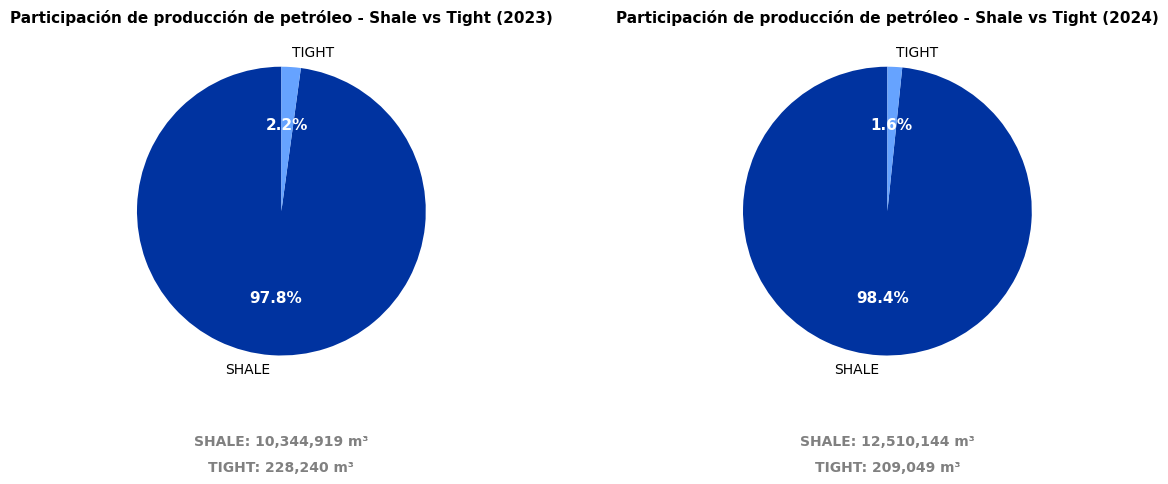

In [ ]:
# Agrupamos la producción de petróleo por subtipo para 2023 y 2024
data_2023 = prod_ypf[prod_ypf['Año'] == 2023].groupby('Subtipo de recurso')['Produccion de Petroleo'].sum()
data_2024 = prod_ypf[prod_ypf['Año'] == 2024].groupby('Subtipo de recurso')['Produccion de Petroleo'].sum()

# Nuevos tonos de azul para diferenciar mejor Shale y Tight
colores_azules_ypf = ['#0033A0', '#66A3FF']  # Azul oscuro y azul claro

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# TORTA 2023
wedges1, texts1, autotexts1 = axes[0].pie(
    data_2023,
    labels=data_2023.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores_azules_ypf
)
axes[0].set_title('Participación de producción de petróleo - Shale vs Tight (2023)', fontsize=11, fontweight='bold')

# Colorear de blanco los porcentajes
for autotext in autotexts1:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Mostrar los totales debajo de la torta 2023
y0 = -0.15
for i, (subtipo, valor) in enumerate(data_2023.items()):
    axes[0].text(0.5, y0 - i*0.07, f'{subtipo}: {int(valor):,} m³',
                 transform=axes[0].transAxes, ha='center', fontsize=10, color='gray', fontweight='bold')

# TORTA 2024
wedges2, texts2, autotexts2 = axes[1].pie(
    data_2024,
    labels=data_2024.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores_azules_ypf
)
axes[1].set_title('Participación de producción de petróleo - Shale vs Tight (2024)', fontsize=11, fontweight='bold')

# Colorear de blanco los porcentajes
for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Mostrar los totales debajo de la torta 2024
for i, (subtipo, valor) in enumerate(data_2024.items()):
    axes[1].text(0.5, y0 - i*0.07, f'{subtipo}: {int(valor):,} m³',
                 transform=axes[1].transAxes, ha='center', fontsize=10, color='gray', fontweight='bold')

plt.tight_layout()
plt.show()

# Analizamos Producción de Gas

**Producción de Gas de las 10 áreas de yacimiento en el 2023**

El siguiente gráfico muestra la producción de gas (Mm3) de las 10 principales áreas de yacimiento de YPF en el 2023 en Vaca Muerta. Es importante detallar que la mayor cantidad producida está concentrada en 5 áreas, las mismas son Rincón del Mangrullo, Río Neuquén, Aguada de la Arena, El Orejano y Loma Campana LLL.

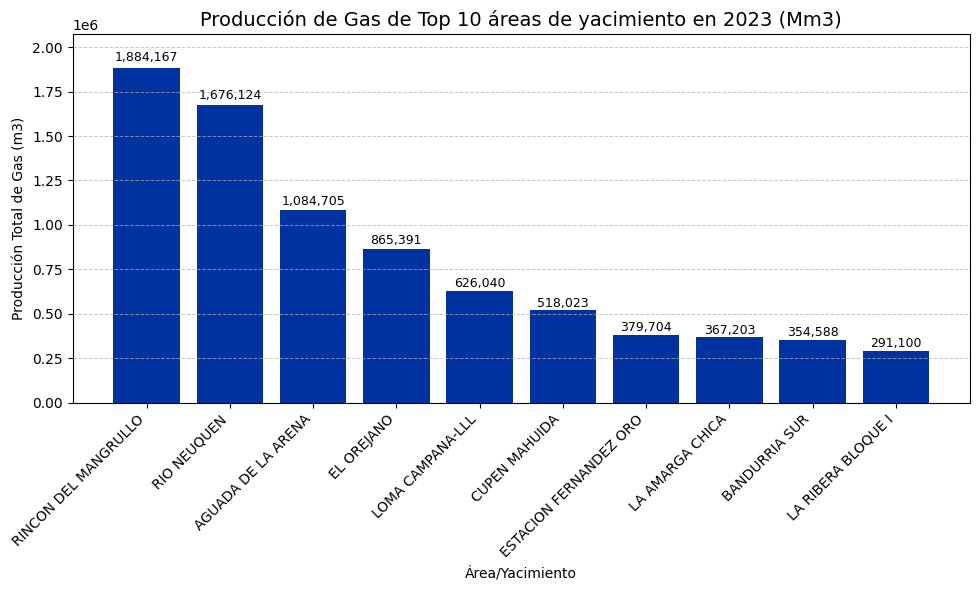

In [ ]:
# Filtrar por año 2023
df_2023 = prod_ypf[prod_ypf['Año'] == 2023]

# Agrupar y obtener top 10 yacimientos por Producción de Gas
top10_yacimientos_gas = (
    df_2023.groupby('areayacimiento')['Produccion de Gas']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Crear gráfico
fig, ax = plt.subplots(figsize=(10,6))

ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

bars = ax.bar(top10_yacimientos_gas.index, top10_yacimientos_gas.values, color='#0033A0')

ax.set_title('Producción de Gas de Top 10 áreas de yacimiento en 2023 (Mm3)', fontsize=14)
ax.set_xlabel('Área/Yacimiento')
ax.set_ylabel('Producción Total de Gas (m3)')
ax.set_xticks(range(len(top10_yacimientos_gas.index)))
ax.set_xticklabels(top10_yacimientos_gas.index, rotation=45, ha='right')

ax.set_ylim(0, top10_yacimientos_gas.values.max() * 1.1)

# Etiquetas arriba de las barras
for bar in bars:
    yval = int(bar.get_height())
    ax.text(bar.get_x() + bar.get_width()/2, yval + yval*0.01, f'{yval:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**Producción mensual de gas en 2023 en Mm3 (Top 5 áreas)**

En 2023, RINCÓN DEL MANGRULLO lideró la producción de gas en Vaca Muerta, aunque con importantes altibajos: comenzó el año en niveles altos, decayó durante el primer semestre, y mostró una fuerte recuperación en julio y diciembre, mes en el que alcanzó su pico con más de 191.000 Mm³.

RIO NEUQUÉN mantuvo una producción estable durante todo el año, sin grandes picos pero con una curva sostenida, consolidándose como el segundo mayor productor con valores cercanos a los 150.000 Mm³ en los meses centrales.

AGUADA DE LA ARENA mostró un crecimiento progresivo hasta mitad de año, con un máximo en mayo-junio. Luego, la producción cayó drásticamente entre agosto y septiembre, pero logró estabilizarse en los últimos meses.

Por su parte, EL OREJANO presentó una curva irregular, con su mejor rendimiento en agosto (casi 87.000 Mm³), pero cerrando el año con una caída significativa, lo que podría reflejar una merma operativa.

Finalmente, LOMA CAMPANA-LLL fue la de menor volumen entre las cinco, con una producción moderada y sostenida, aunque sin variaciones destacadas.

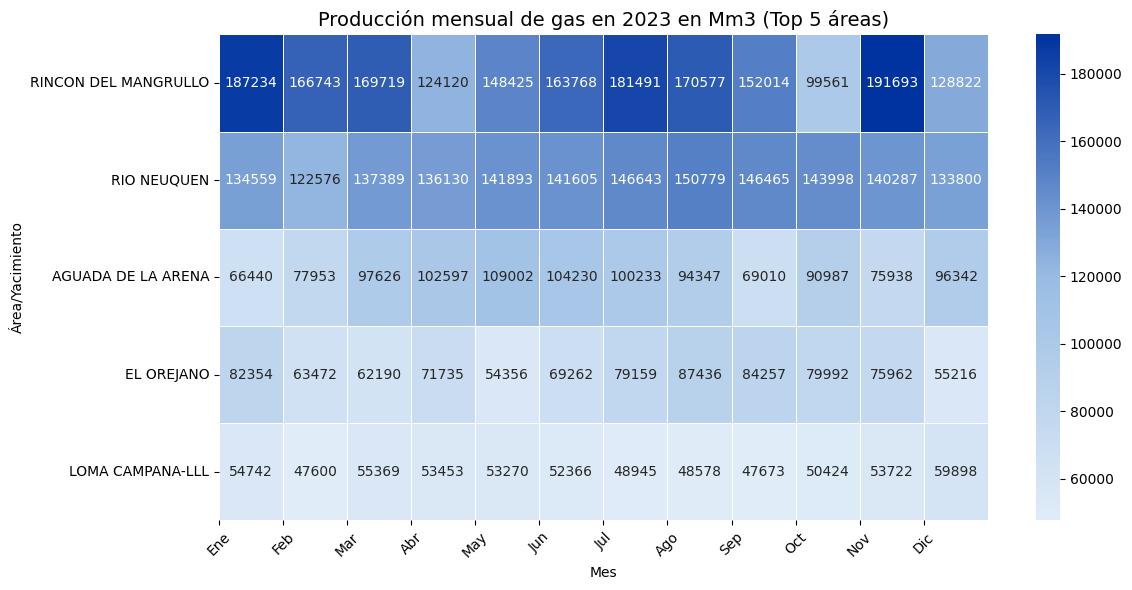

In [ ]:
# Paso 1: Filtrar por año 2023
df_2023 = prod_ypf[prod_ypf['Año'] == 2023]

# Paso 2: Obtener las Top 10 áreas/yacimientos por producción de Gas
top10_yacimientos = (
    df_2023.groupby('areayacimiento')['Produccion de Gas']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Paso 3: Seleccionar las Top 5 áreas
top5_areas = top10_yacimientos.head(5).index

# Paso 4: Filtrar el DataFrame para las Top 5 áreas
df_top5 = df_2023[df_2023['areayacimiento'].isin(top5_areas)]

# Paso 5: (Opcional) Crear columna 'Mes' si no existe
# df_top5['Mes'] = pd.to_datetime(df_top5['Fecha']).dt.month  # Descomentar si es necesario

# Paso 6: Agrupar por área y mes, sumar la producción
produccion_mensual = (
    df_top5
    .groupby(['areayacimiento', 'Mes'])['Produccion de Gas']
    .sum()
    .unstack(fill_value=0)
)

# Paso 7: Reordenar las filas por producción total anual (de mayor a menor)
orden_areas = produccion_mensual.sum(axis=1).sort_values(ascending=False).index
produccion_mensual = produccion_mensual.loc[orden_areas]

# Paso 8: Crear paleta de colores personalizada con azul YPF
ypf_blues = LinearSegmentedColormap.from_list("ypf_blues", ["#e0ecf8", "#99bce3", "#0033A0"])

# Paso 9: Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(produccion_mensual, annot=True, fmt=".0f", cmap=ypf_blues, linewidths=.5)

plt.title("Producción mensual de gas en 2023 en Mm3 (Top 5 áreas)", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("Área/Yacimiento")
plt.xticks(
    ticks=range(12),
    labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'],
    rotation=45
)
plt.tight_layout()
plt.show()

**Producción de Gas de las 10 áreas de yacimiento en el 2024**

El siguiente gráfico muestra la producción de gas (Mm3) de las 10 principales áreas de yacimiento de YPF en el 2023 en Vaca Muerta. Es importante detallar que la mayor cantidad producida está concentrada en 5 áreas, las mismas son Rincón del Mangrullo, Río Neuquén, Aguada de la Arena, Loma Campana LLL y El Orejano.

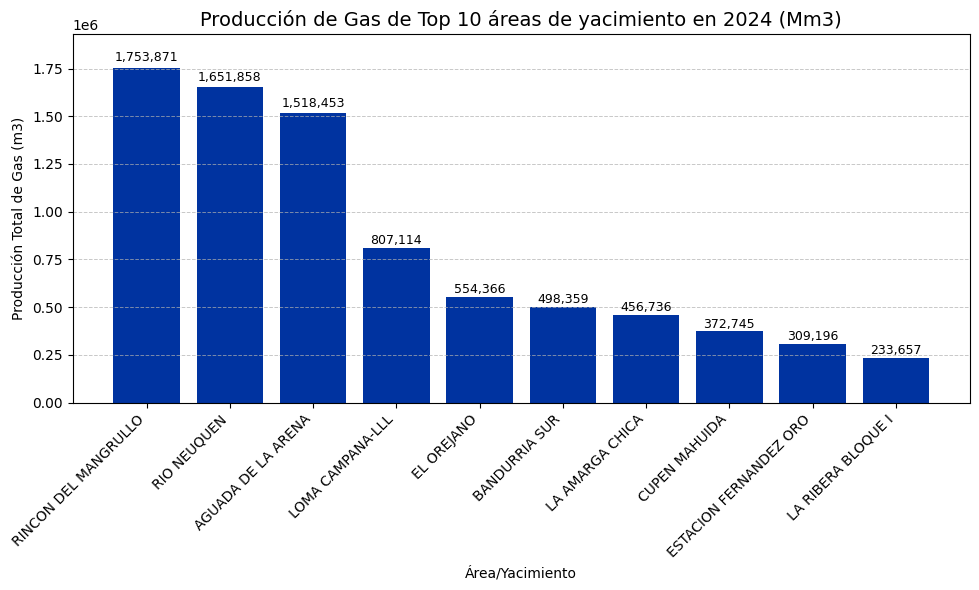

In [ ]:
# Filtrar por año 2024
df_2024 = prod_ypf[prod_ypf['Año'] == 2024]

# Agrupar y obtener top 10 yacimientos por Producción de Gas
top10_yacimientos_gas_2024 = (
    df_2024.groupby('areayacimiento')['Produccion de Gas']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Crear gráfico
fig, ax = plt.subplots(figsize=(10,6))

ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

bars = ax.bar(top10_yacimientos_gas_2024.index, top10_yacimientos_gas_2024.values, color='#0033A0')

ax.set_title('Producción de Gas de Top 10 áreas de yacimiento en 2024 (Mm3)', fontsize=14)
ax.set_xlabel('Área/Yacimiento')
ax.set_ylabel('Producción Total de Gas (m3)')
ax.set_xticks(range(len(top10_yacimientos_gas_2024.index)))
ax.set_xticklabels(top10_yacimientos_gas_2024.index, rotation=45, ha='right')

ax.set_ylim(0, top10_yacimientos_gas_2024.values.max() * 1.1)

# Etiquetas arriba de las barras
for bar in bars:
    yval = int(bar.get_height())
    ax.text(bar.get_x() + bar.get_width()/2, yval + yval*0.01, f'{yval:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**Producción mensual de gas en 2024 en Mm3 (Top 5 áreas)**

Durante 2024, RINCÓN DEL MANGRULLO volvió a liderar la producción de gas, aunque con un desempeño más irregular que en 2023. Si bien alcanzó su pico en marzo con más de 192.000 Mm³, desde mayo en adelante mostró una tendencia descendente, cerrando el año en diciembre con apenas 53.632 Mm³, lo que sugiere posibles problemas operativos o restricciones técnicas.

RIO NEUQUÉN mantuvo su rol como segundo productor con gran estabilidad en la primera mitad del año, superando los 150.000 Mm³ entre mayo y julio. Sin embargo, desde agosto se observa un leve pero sostenido descenso, cayendo a poco más de 123.000 Mm³ en diciembre.

La gran sorpresa del año fue AGUADA DE LA ARENA, que tuvo un fuerte crecimiento entre abril y agosto, destacándose con un máximo de 193.485 Mm³ en agosto, incluso superando momentáneamente a Rincón del Mangrullo. No obstante, esta alza fue seguida por una marcada caída en los últimos meses, posiblemente por razones operativas o logísticas.

LOMA CAMPANA-LLL mostró una recuperación continua a lo largo del año: partió de cifras moderadas en enero (62.136 Mm³) y cerró en diciembre con su mejor marca: 87.633 Mm³. Esto sugiere una estrategia de optimización o inversión en infraestructura.

Finalmente, EL OREJANO tuvo un año muy volátil: inició con niveles bajos, repuntó a mediados de año, pero volvió a caer fuertemente en octubre y noviembre. Esta inestabilidad puede estar relacionada con la variabilidad de los pozos o decisiones estratégicas de producción.

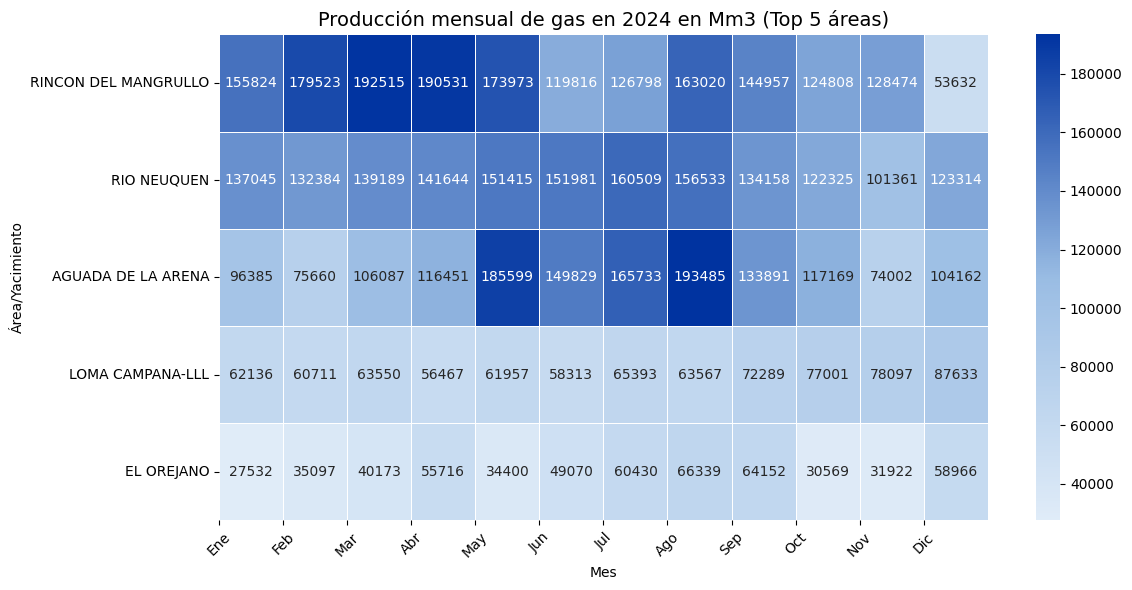

In [ ]:
# Paso 1: Filtrar por año 2024
df_2024 = prod_ypf[prod_ypf['Año'] == 2024]

# Paso 2: Obtener las Top 10 áreas/yacimientos por producción de Gas
top10_yacimientos = (
    df_2024.groupby('areayacimiento')['Produccion de Gas']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Paso 3: Seleccionar las Top 5 áreas
top5_areas = top10_yacimientos.head(5).index

# Paso 4: Filtrar el DataFrame para las Top 5 áreas
df_top5 = df_2024[df_2024['areayacimiento'].isin(top5_areas)]

# Paso 5: (Opcional) Crear columna 'Mes' si no existe
# df_top5['Mes'] = pd.to_datetime(df_top5['Fecha']).dt.month  # Descomentar si es necesario

# Paso 6: Agrupar por área y mes, sumar la producción
produccion_mensual = (
    df_top5
    .groupby(['areayacimiento', 'Mes'])['Produccion de Gas']
    .sum()
    .unstack(fill_value=0)
)

# Paso 7: Reordenar las filas por producción total anual (de mayor a menor)
orden_areas = produccion_mensual.sum(axis=1).sort_values(ascending=False).index
produccion_mensual = produccion_mensual.loc[orden_areas]

# Paso 8: Crear paleta de colores personalizada con azul YPF
ypf_blues = LinearSegmentedColormap.from_list("ypf_blues", ["#e0ecf8", "#99bce3", "#0033A0"])

# Paso 9: Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(produccion_mensual, annot=True, fmt=".0f", cmap=ypf_blues, linewidths=.5)

plt.title("Producción mensual de gas en 2024 en Mm3 (Top 5 áreas)", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("Área/Yacimiento")
plt.xticks(
    ticks=range(12),
    labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'],
    rotation=45
)
plt.tight_layout()
plt.show()

**Participación de la gas de petróleo de las Top 5 áreas**

El siguiente gráfico circular muestra en detalle la representatividad que manifiesta las principales 5 áreas de yacimiento en relación a la producción de gas de un año y el siguiente. El área que mantuvo su participación fue Río Neuquén con el 19%, mientras que las demás áreas tuvieron una leve variación en la participación, como por ejemplo la Aguada de la Arena que aumentó un 5% la misma, siendo este dato finalmente del 17% en el 2024.

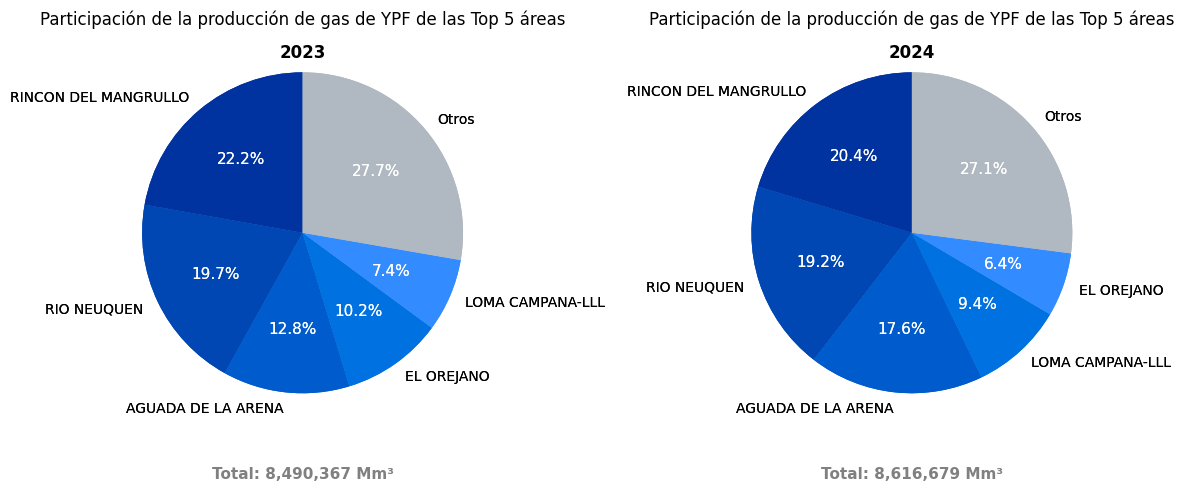

In [ ]:
def preparar_datos_porcentaje(df, año, columna_area, columna_valor, top_n=5):
    df_año = df[df['Año'] == año]
    suma_por_area = df_año.groupby(columna_area)[columna_valor].sum()
    top = suma_por_area.sort_values(ascending=False).head(top_n)
    otros = suma_por_area.sum() - top.sum()
    datos = pd.concat([top, pd.Series({'Otros': otros})])
    porcentaje = datos / datos.sum() * 100
    total_produccion = suma_por_area.sum()
    return porcentaje, total_produccion

# Paleta de azules YPF
colores_azules_ypf = ['#0033A0', '#0047B3', '#005CCD', '#0071E0', '#338CFF', '#B0B8C1']

porc_2023_gas, total_2023_gas = preparar_datos_porcentaje(prod_ypf, 2023, 'areayacimiento', 'Produccion de Gas')
porc_2024_gas, total_2024_gas = preparar_datos_porcentaje(prod_ypf, 2024, 'areayacimiento', 'Produccion de Gas')

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Gráfica 2023
axes[0].pie(porc_2023_gas, labels=porc_2023_gas.index, autopct='%1.1f%%', startangle=90, colors=colores_azules_ypf)
axes[0].set_title('Participación de la producción de gas de YPF de las Top 5 áreas', fontsize=12)
axes[0].text(0.5, 0.95, '2023', ha='center', va='center', fontsize=12, fontweight='bold', transform=axes[0].transAxes)
axes[0].text(0.5, -0.1, f'Total: {int(total_2023_gas):,} Mm³', ha='center', va='center', fontsize=11, color='gray', fontweight='bold', transform=axes[0].transAxes)

# Gráfica 2024
axes[1].pie(porc_2024_gas, labels=porc_2024_gas.index, autopct='%1.1f%%', startangle=90, colors=colores_azules_ypf)
axes[1].set_title('Participación de la producción de gas de YPF de las Top 5 áreas', fontsize=12)
axes[1].text(0.5, 0.95, '2024', ha='center', va='center', fontsize=12, fontweight='bold', transform=axes[1].transAxes)
axes[1].text(0.5, -0.1, f'Total: {int(total_2024_gas):,} Mm³', ha='center', va='center', fontsize=11, color='gray', fontweight='bold', transform=axes[1].transAxes)

def func_pct(pct):
    return f'{pct:.1f}%' if pct > 0 else ''

# En el pie chart:
axes[0].pie(porc_2023_gas, labels=porc_2023_gas.index,
            autopct=func_pct,
            startangle=90,
            colors=colores_azules_ypf)

axes[1].pie(porc_2024_gas, labels=porc_2024_gas.index,
            autopct=func_pct,
            startangle=90,
            colors=colores_azules_ypf)

# Cambiar color y tamaño de los textos de porcentaje:
for text in axes[0].texts:
    if '%' in text.get_text():
        text.set_color('white')
        text.set_fontsize(11)

for text in axes[1].texts:
    if '%' in text.get_text():
        text.set_color('white')
        text.set_fontsize(11)

plt.tight_layout()
plt.show()

**Participación de producción de gas - Shale vs Tight**

A continuación se puede observar un gráfico circular por el año 2023 y 2024 de la participación en la producción de gas según el subtipo de recurso. En este caso se da una diferencia con respecto a la producción de petróleo ya que si hay mayor producción del subtipo Tigth, siendo un promedio 65% shale y 35% tignt entre ambos años.

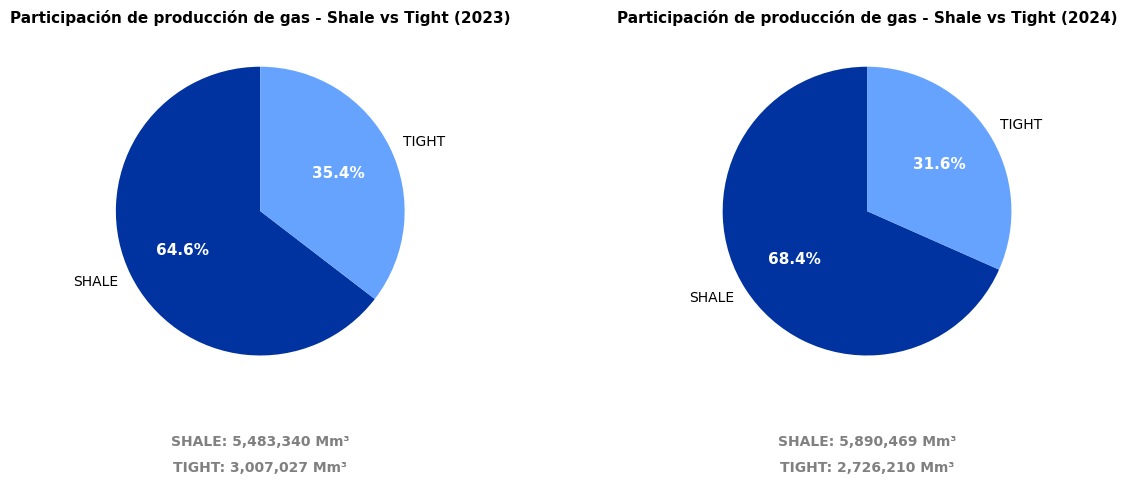

In [ ]:
# Agrupamos la producción de gas por subtipo para 2023 y 2024
data_2023 = prod_ypf[prod_ypf['Año'] == 2023].groupby('Subtipo de recurso')['Produccion de Gas'].sum()
data_2024 = prod_ypf[prod_ypf['Año'] == 2024].groupby('Subtipo de recurso')['Produccion de Gas'].sum()

# Nuevos tonos de azul para diferenciar mejor Shale y Tight
colores_azules_ypf = ['#0033A0', '#66A3FF']  # Azul oscuro y azul claro

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# TORTA 2023
wedges1, texts1, autotexts1 = axes[0].pie(
    data_2023,
    labels=data_2023.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores_azules_ypf
)
axes[0].set_title('Participación de producción de gas - Shale vs Tight (2023)', fontsize=11, fontweight='bold')

# Colorear de blanco los porcentajes
for autotext in autotexts1:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Mostrar los totales debajo de la torta 2023
y0 = -0.15
for i, (subtipo, valor) in enumerate(data_2023.items()):
    axes[0].text(0.5, y0 - i*0.07, f'{subtipo}: {int(valor):,} Mm³',
                 transform=axes[0].transAxes, ha='center', fontsize=10, color='gray', fontweight='bold')

# TORTA 2024
wedges2, texts2, autotexts2 = axes[1].pie(
    data_2024,
    labels=data_2024.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores_azules_ypf
)
axes[1].set_title('Participación de producción de gas - Shale vs Tight (2024)', fontsize=11, fontweight='bold')

# Colorear de blanco los porcentajes
for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Mostrar los totales debajo de la torta 2024
for i, (subtipo, valor) in enumerate(data_2024.items()):
    axes[1].text(0.5, y0 - i*0.07, f'{subtipo}: {int(valor):,} Mm³',
                 transform=axes[1].transAxes, ha='center', fontsize=10, color='gray', fontweight='bold')

plt.tight_layout()
plt.show()

Vamos a ver que valores están incluidas en cada categoría

In [ ]:
#Para el caso de tipo de pozo podemos ver las diferentes categorías y el conteo de las mismas
prod_ypf.groupby('Tipo de estado')['Tipo de estado'].count()

,Tipo de estado
Tipo de estado,
A Abandonar,1247
Abandonado,590
Abandono Temporario,219
En Espera de Reparación,809
En Estudio,3439
En Inyección Efectiva,271
En Reparación,153
En Reserva de Gas,633
En Reserva para Recup. Sec./Asist.,50


In [ ]:
#Normalizamos la feature tipo de estado, se puede observar que la mayor proporción es la extracción efectiva con un 78,86%
prod_ypf['Tipo de estado'].value_counts(normalize=True)

,proportion
Tipo de estado,
Extracción Efectiva,0.788631
Parado Transitoriamente,0.077404
En Estudio,0.060956
A Abandonar,0.022103
En Espera de Reparación,0.014339
En Reserva de Gas,0.011220
Abandonado,0.010458
En Inyección Efectiva,0.004803
Abandono Temporario,0.003882


In [ ]:
#Acá vemos el recuento de registros para las categorias del feature Tipo de extracción
prod_ypf.groupby('Tipo de extraccion')['Tipo de extraccion'].count()

,Tipo de extraccion
Tipo de extraccion,
Bombeo Mecánico,8791
Electrosumergible,25
Gas Lift,420
Plunger Lift,14855
Sin Sistema de Extracción,1201
Surgencia Natural,31126


In [ ]:
#En este caso al normalizar, se puede observar que el 55,17% de los datos está concentrado en la categoría Surgencia Natural
prod_ypf['Tipo de extraccion'].value_counts(normalize=True)

,proportion
Tipo de extraccion,
Surgencia Natural,0.551703
Plunger Lift,0.263302
Bombeo Mecánico,0.155819
Sin Sistema de Extracción,0.021288
Gas Lift,0.007444
Electrosumergible,0.000443


In [ ]:
#Acá vemos el recuento de registros para las categorias del feature Tipo de pozo
prod_ypf.groupby('Tipo de pozo')['Tipo de pozo'].count()

,Tipo de pozo
Tipo de pozo,
Gasífero,20207
Inyección de Agua,21
Otro tipo,6358
Petrolífero,29581
Sumidero,251


In [ ]:
#Normalizamos la feature tipo de pozo, siendo el 52,43% de los registros para la categoría Petrolífero, luego sigue el caso de Gasífero con el 35,81%
prod_ypf['Tipo de pozo'].value_counts(normalize=True)

,proportion
Tipo de pozo,
Petrolífero,0.524318
Gasífero,0.358166
Otro tipo,0.112695
Sumidero,0.004449
Inyección de Agua,0.000372


In [ ]:
#Areas de concesión
prod_ypf.groupby('Area de permiso de concesion')['Area de permiso de concesion'].count()

,Area de permiso de concesion
Area de permiso de concesion,
AGUADA DE LA ARENA,832
AGUADA DEL CHAÑAR,472
AL NORTE DE LA DORSAL,1080
BAJO DEL TORO,54
BAJO DEL TORO NORTE,428
BANDURRIA SUR,3061
CERRO ARENA,108
CERRO LAS MINAS,27
CERRO MANRIQUE,16


**Mapa de la producción de petróleo de las principales 5 áreas en el 2023**

In [ ]:
import folium
from folium import Map, Marker
from folium.map import Icon
from branca.element import Figure

# Obtener las 5 principales áreas de producción de petróleo en 2023
top10_yacimientos_2023 = (
    prod_ypf[prod_ypf['Año'] == 2023]
    .groupby('areayacimiento')['Produccion de Petroleo']
    .sum()
    .sort_values(ascending=False)
)

top5_areas_petroleo_2023 = top10_yacimientos_2023.head(5).index.tolist()

# Filtrar los datos de esas áreas
df_top5_petroleo_2023 = prod_ypf[
    (prod_ypf['areayacimiento'].isin(top5_areas_petroleo_2023)) &
    (prod_ypf['Año'] == 2023) &
    (prod_ypf['Produccion de Petroleo'] > 0)
].copy()

# Producción total 2023 por área
produccion_total_2023 = df_top5_petroleo_2023.groupby('areayacimiento')['Produccion de Petroleo'].sum().astype(int)

# Producción total 2022 por área
produccion_total_2023 = (
    prod_ypf[prod_ypf['Año'] == 2023]
    .groupby('areayacimiento')['Produccion de Petroleo']
    .sum()
    .astype(int)
)

# Calcular centroide del mapa
center_lat = df_top5_petroleo_2023['coordenaday'].mean()
center_lon = df_top5_petroleo_2023['coordenadax'].mean()

# Crear figura con tamaño más grande
fig = Figure(width=1000, height=900)
m = folium.Map(location=[center_lat, center_lon], zoom_start=9)
fig.add_child(m)

# Centroide por área
centroides_areas = df_top5_petroleo_2023.groupby('areayacimiento')[['coordenaday', 'coordenadax']].mean()

# Lista de desplazamientos (lat, lon) para que las etiquetas no se superpongan
offsets = [
    (0.01, 0.01),
    (-0.01, 0.01),
    (0.01, -0.01),
    (-0.01, -0.01),
    (0.015, 0)
]

# Añadir marcador azul + nombre y producción debajo como etiqueta persistente
for i, area in enumerate(top5_areas_petroleo_2023):
    if area in centroides_areas.index:
        lat, lon = centroides_areas.loc[area]
        produccion_2023 = produccion_total_2023[area]
        produccion_2022 = produccion_total_2023.get(area, 0)

        # Marcador gotita azul YPF
        folium.Marker(
            location=[lat, lon],
            icon=Icon(color='blue', icon='tint', prefix='fa'),
            popup=f"<b>{area}</b><br>2023: {produccion_2023:,} m³"
        ).add_to(m)

        # Aplico desplazamiento para evitar superposición
        offset_lat, offset_lon = offsets[i % len(offsets)]
        etiqueta_lat = lat + offset_lat
        etiqueta_lon = lon + offset_lon

        # Etiqueta con nombre arriba y producción debajo
        folium.map.Marker(
            [etiqueta_lat, etiqueta_lon],
            icon=folium.DivIcon(
                html=f"""
                <div style="
                    font-size: 12px;
                    font-weight: bold;
                    color: #0033A0;
                    background-color: rgba(255, 255, 255, 0.85);
                    padding: 2px 5px;
                    border-radius: 4px;
                    box-shadow: 1px 1px 2px #ccc;
                    text-align: center;">
                    {area}<br>{produccion_2023:,} m³
                </div>
                """
            )
        ).add_to(m)

# Mostrar el mapa
m

**Mapa de la producción de gas de las principales 5 áreas en el 2023**

In [ ]:
import folium
from folium import Map, Marker
from folium.map import Icon
from branca.element import Figure

# Obtener las 5 principales áreas de producción de gas en 2023
top10_gas_2023 = (
    prod_ypf[prod_ypf['Año'] == 2023]
    .groupby('areayacimiento')['Produccion de Gas']
    .sum()
    .sort_values(ascending=False)
)

top5_areas_gas_2023 = top10_gas_2023.head(5).index.tolist()

# Filtrar los datos de esas áreas
df_top5_gas_2023 = prod_ypf[
    (prod_ypf['areayacimiento'].isin(top5_areas_gas_2023)) &
    (prod_ypf['Año'] == 2023) &
    (prod_ypf['Produccion de Gas'] > 0)
].copy()

# Producción total 2023 por área
produccion_total_gas_2023 = df_top5_gas_2023.groupby('areayacimiento')['Produccion de Gas'].sum().astype(int)

# Producción total 2023 por área
produccion_total_gas_2023 = (
    prod_ypf[prod_ypf['Año'] == 2023]
    .groupby('areayacimiento')['Produccion de Gas']
    .sum()
    .astype(int)
)

# Calcular centroide del mapa
center_lat = df_top5_gas_2023['coordenaday'].mean()
center_lon = df_top5_gas_2023['coordenadax'].mean()

# Crear figura con tamaño más grande
fig = Figure(width=800, height=600)
m = folium.Map(location=[center_lat, center_lon], zoom_start=9)
fig.add_child(m)

# Centroide por área
centroides_areas = df_top5_gas_2023.groupby('areayacimiento')[['coordenaday', 'coordenadax']].mean()

# Lista de desplazamientos para evitar superposición
offsets = [
    (0.01, 0.01),
    (-0.01, 0.01),
    (0.01, -0.01),
    (-0.01, -0.01),
    (0.015, 0)
]

# Añadir marcador azul + nombre y producción debajo como etiqueta persistente
for i, area in enumerate(top5_areas_gas_2023):
    if area in centroides_areas.index:
        lat, lon = centroides_areas.loc[area]
        gas_2023 = produccion_total_gas_2023[area]
        gas_2022 = produccion_total_gas_2023.get(area, 0)

        # Marcador gotita azul YPF
        folium.Marker(
            location=[lat, lon],
            icon=Icon(color='blue', icon='tint', prefix='fa'),
            popup=f"<b>{area}</b><br>2023: {gas_2023:,} Mm³"
        ).add_to(m)

        # Aplicar desplazamiento
        offset_lat, offset_lon = offsets[i % len(offsets)]
        etiqueta_lat = lat + offset_lat
        etiqueta_lon = lon + offset_lon

        # Etiqueta con nombre + producción anterior
        folium.map.Marker(
            [etiqueta_lat, etiqueta_lon],
            icon=folium.DivIcon(
                html=f"""
                <div style="
                    font-size: 12px;
                    font-weight: bold;
                    color: #0033A0;
                    background-color: rgba(255, 255, 255, 0.85);
                    padding: 2px 5px;
                    border-radius: 4px;
                    box-shadow: 1px 1px 2px #ccc;
                    text-align: center;">
                    {area}<br>{gas_2023:,} Mm³
                </div>
                """
            )
        ).add_to(m)

# Mostrar el mapa
m

**Mapa de la producción de petróleo de las principales 5 áreas en el 2024**

In [ ]:
import folium
from folium import Map, Marker
from folium.map import Icon
from branca.element import Figure

# Obtener las 5 principales áreas de producción de petróleo en 2024
top10_yacimientos_2024 = (
    prod_ypf[prod_ypf['Año'] == 2024]
    .groupby('areayacimiento')['Produccion de Petroleo']
    .sum()
    .sort_values(ascending=False)
)

top5_areas_petroleo_2024 = top10_yacimientos_2024.head(5).index.tolist()

# Filtrar los datos de esas áreas
df_top5_petroleo_2024 = prod_ypf[
    (prod_ypf['areayacimiento'].isin(top5_areas_petroleo_2024)) &
    (prod_ypf['Año'] == 2024) &
    (prod_ypf['Produccion de Petroleo'] > 0)
].copy()

# Promedio de producción por área
produccion_promedio_por_area = df_top5_petroleo_2024.groupby('areayacimiento')['Produccion de Petroleo'].sum().astype(int)

# Producción total 2023 por área
produccion_total_2023 = (
    prod_ypf[prod_ypf['Año'] == 2023]
    .groupby('areayacimiento')['Produccion de Petroleo']
    .sum()
    .astype(int)
)

# Calcular centroide del mapa
center_lat = df_top5_petroleo_2024['coordenaday'].mean()
center_lon = df_top5_petroleo_2024['coordenadax'].mean()

# Crear figura con tamaño más grande
fig = Figure(width=1000, height=900)
m = folium.Map(location=[center_lat, center_lon], zoom_start=9)
fig.add_child(m)

# Centroide por área
centroides_areas = df_top5_petroleo_2024.groupby('areayacimiento')[['coordenaday', 'coordenadax']].mean()

# Lista de desplazamientos (lat, lon) para que las etiquetas no se superpongan
offsets = [
    (0.01, 0.01),
    (-0.01, 0.01),
    (0.01, -0.01),
    (-0.01, -0.01),
    (0.015, 0)
]

# Añadir marcador azul + nombre y producción debajo como etiqueta persistente
for i, area in enumerate(top5_areas_petroleo_2024):
    if area in centroides_areas.index:
        lat, lon = centroides_areas.loc[area]
        produccion_2024 = produccion_promedio_por_area[area]
        produccion_2023 = produccion_total_2023.get(area, 0)

        # Marcador gotita azul YPF
        folium.Marker(
            location=[lat, lon],
            icon=Icon(color='blue', icon='tint', prefix='fa'),
            popup=f"<b>{area}</b><br>2024: {produccion_2024:,} m³"
        ).add_to(m)

        # Aplico desplazamiento para evitar superposición
        offset_lat, offset_lon = offsets[i % len(offsets)]
        etiqueta_lat = lat + offset_lat
        etiqueta_lon = lon + offset_lon

        # Etiqueta con nombre arriba y producción debajo
        folium.map.Marker(
            [etiqueta_lat, etiqueta_lon],
            icon=folium.DivIcon(
                html=f"""
                <div style="
                    font-size: 12px;
                    font-weight: bold;
                    color: #0033A0;
                    background-color: rgba(255, 255, 255, 0.85);
                    padding: 2px 5px;
                    border-radius: 4px;
                    box-shadow: 1px 1px 2px #ccc;
                    text-align: center;">
                    {area}<br>{produccion_2023:,} m³
                </div>
                """
            )
        ).add_to(m)

# Mostrar el mapa
m

**Mapa de la producción de gas de las principales 5 áreas en el 2024**

In [ ]:
import folium
from folium import Map, Marker
from folium.map import Icon
from branca.element import Figure

# Obtener las 5 principales áreas de producción de gas en 2024
top10_gas_2024 = (
    prod_ypf[prod_ypf['Año'] == 2024]
    .groupby('areayacimiento')['Produccion de Gas']
    .sum()
    .sort_values(ascending=False)
)

top5_areas_gas_2024 = top10_gas_2024.head(5).index.tolist()

# Filtrar los datos de esas áreas
df_top5_gas_2024 = prod_ypf[
    (prod_ypf['areayacimiento'].isin(top5_areas_gas_2024)) &
    (prod_ypf['Año'] == 2024) &
    (prod_ypf['Produccion de Gas'] > 0)
].copy()

# Producción total 2024 por área
produccion_total_gas_2024 = df_top5_gas_2024.groupby('areayacimiento')['Produccion de Gas'].sum().astype(int)

# Producción total 2023 por área
produccion_total_gas_2023 = (
    prod_ypf[prod_ypf['Año'] == 2023]
    .groupby('areayacimiento')['Produccion de Gas']
    .sum()
    .astype(int)
)

# Calcular centroide del mapa
center_lat = df_top5_gas_2024['coordenaday'].mean()
center_lon = df_top5_gas_2024['coordenadax'].mean()

# Crear figura con tamaño más grande
fig = Figure(width=800, height=600)
m = folium.Map(location=[center_lat, center_lon], zoom_start=9)
fig.add_child(m)

# Centroide por área
centroides_areas = df_top5_gas_2024.groupby('areayacimiento')[['coordenaday', 'coordenadax']].mean()

# Lista de desplazamientos para evitar superposición
offsets = [
    (0.01, 0.01),
    (-0.01, 0.01),
    (0.01, -0.01),
    (-0.01, -0.01),
    (0.015, 0)
]

# Añadir marcador azul + nombre y producción debajo como etiqueta persistente
for i, area in enumerate(top5_areas_gas_2024):
    if area in centroides_areas.index:
        lat, lon = centroides_areas.loc[area]
        gas_2024 = produccion_total_gas_2024[area]
        gas_2023 = produccion_total_gas_2023.get(area, 0)

        # Marcador gotita azul YPF
        folium.Marker(
            location=[lat, lon],
            icon=Icon(color='blue', icon='tint', prefix='fa'),
            popup=f"<b>{area}</b><br>2024: {gas_2024:,} Mm³"
        ).add_to(m)

        # Aplicar desplazamiento
        offset_lat, offset_lon = offsets[i % len(offsets)]
        etiqueta_lat = lat + offset_lat
        etiqueta_lon = lon + offset_lon

        # Etiqueta con nombre + producción
        folium.map.Marker(
            [etiqueta_lat, etiqueta_lon],
            icon=folium.DivIcon(
                html=f"""
                <div style="
                    font-size: 12px;
                    font-weight: bold;
                    color: #0033A0;
                    background-color: rgba(255, 255, 255, 0.85);
                    padding: 2px 5px;
                    border-radius: 4px;
                    box-shadow: 1px 1px 2px #ccc;
                    text-align: center;">
                    {area}<br>{gas_2023:,} Mm³
                </div>
                """
            )
        ).add_to(m)

# Mostrar el mapa
m

In [ ]:
#Loma campana es el área de permiso de concesión mayoritaria para YPF
prod_ypf['Area de permiso de concesion'].value_counts(normalize=True)

,proportion
Area de permiso de concesion,
LOMA CAMPANA,0.371105
LOMA LA LATA - SIERRA BARROSA,0.108671
LA AMARGA CHICA,0.098763
RINCON DEL MANGRULLO,0.089386
ESTACION FERNANDEZ ORO,0.087277
BANDURRIA SUR,0.054256
RIO NEUQUEN,0.053157
EL OREJANO,0.045092
AL NORTE DE LA DORSAL,0.019143


In [ ]:
#Areas de yacimientos
prod_ypf.groupby('areayacimiento')['areayacimiento'].count()

,areayacimiento
areayacimiento,
AGUADA DE LA ARENA,832
BAJO DEL TORO,54
BAJO DEL TORO NORTE,428
BANDURRIA SUR,3061
BARDA GONZALEZ,54
BARREALES COLORADOS,27
BARROSA NORTE,567
CAMPAMENTO DOS,27
CERRO ARENA,108


In [ ]:
#Para el feature de area de yacimiento también Loma Campana es el área mayoritaria para YPF
prod_ypf['areayacimiento'].value_counts(normalize=True)

,proportion
areayacimiento,
LOMA CAMPANA-LLL,0.284838
LA AMARGA CHICA,0.098763
RINCON DEL MANGRULLO,0.088908
ESTACION FERNANDEZ ORO,0.087277
CUPEN MAHUIDA,0.087100
LOMA CAMPANA,0.086267
BANDURRIA SUR,0.054256
RIO NEUQUEN,0.053157
EL OREJANO,0.045092


Es importante incorporar una definición respecto del hidrocarburo no convencional, ya que el dataset se centra en este tipo de hidrocarburo. El hidrocarburo no convencional son aquellos hidrocarburos que están contenidos en formaciones geológicas con características físicas que impiden su flujo natural hacia el pozo. Por eso, requieren tecnologías especiales como la fractura hidráulica (fracking) y los pozos horizontales para ser explotados de manera rentable.

In [ ]:
#La totalidad de los registros son de tipo de recurso no convencional
prod_ypf.groupby('Tipo de recurso')['Tipo de recurso'].count()

,Tipo de recurso
Tipo de recurso,
NO CONVENCIONAL,56418


En el caso de la diferencia entre shale y tigh, esta radica para el caso del shale la roca sedimentaria. El shale es la roca madre y a la vez el reservorio (auto generador y auto contenedor), para su producción se necesita fractura hidraúlica y pozos horizontales para liberar el gas o el petróleo atrapado en la matriz de la roca. En cambio para el tipo tight el tipo de roca es arenisca, caliza o dolomita muy compacta. En  este caso la roca no es generadora, solo almacena el hidrocarburo que migró desde otra roca madre. Para su producción también requiere fractura hidraúlica, pero a veces con menor intensidad.

In [ ]:

prod_ypf.groupby('Subtipo de recurso')['Subtipo de recurso'].count()

,Subtipo de recurso
Subtipo de recurso,
SHALE,37113
TIGHT,19305


In [ ]:
prod_ypf['Subtipo de recurso'].value_counts(normalize=True)

,proportion
Subtipo de recurso,
SHALE,0.657822
TIGHT,0.342178


In [ ]:
prod_ypf.groupby(by=['Tipo de recurso','Subtipo de recurso','areayacimiento','Tipo de pozo'])["Produccion de Petroleo"].mean()


Tipo de recurso  Subtipo de recurso  areayacimiento       Tipo de pozo
NO CONVENCIONAL  SHALE               AGUADA DE LA ARENA   Gasífero        36.343164
                                                          Otro tipo        0.000000
                                     BAJO DEL TORO        Otro tipo        0.000000
                                                          Sumidero         0.000000
                                     BAJO DEL TORO NORTE  Otro tipo        0.000000
                                                                            ...    
                 TIGHT               RIO NEUQUEN          Otro tipo        0.000000
                                                          Petrolífero      0.703704
                                     SIERRA BARROSA       Gasífero         0.000000
                                                          Otro tipo        0.000000
                                     SIERRA BARROSA ESTE  Gasífero         0.000000
Name: Produccion de Petroleo, Length: 91, dtype: float64

In [ ]:
boxplot_prod_ypf=prod_ypf.melt(id_vars=['Subtipo de recurso'], value_vars=['Produccion de Petroleo','Produccion de Gas'])
boxplot_prod_ypf = boxplot_prod_ypf[boxplot_prod_ypf['value'] != 0]
boxplot_prod_ypf

,Subtipo de recurso,variable,value
0,TIGHT,Produccion de Petroleo,32
4,SHALE,Produccion de Petroleo,55
6,SHALE,Produccion de Petroleo,1009
8,SHALE,Produccion de Petroleo,10
9,SHALE,Produccion de Petroleo,656
...,...,...,...
112828,SHALE,Produccion de Gas,1
112829,SHALE,Produccion de Gas,203
112830,SHALE,Produccion de Gas,168
112832,SHALE,Produccion de Gas,101


# Detección de Outliers

Con los siguientes gráficos podemos observar que el dataset contiene muchos outliers y que la proudcción de petróleo y de gas tiene una distribución asimétrica( sesgada hacia la derecha)

(0.0, 5000.0)

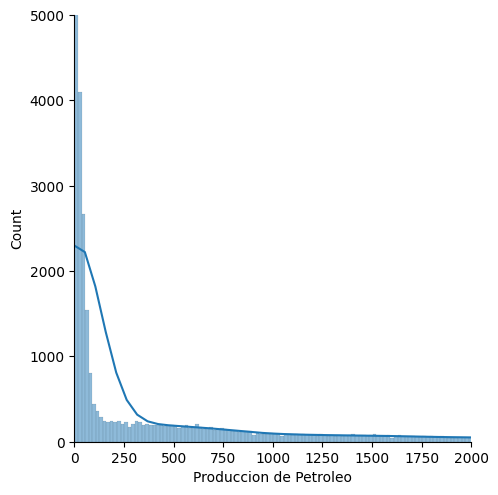

In [ ]:
#El gráfico muestra la frecuencia de los valores de producción de petroleo, se puede observar que los datos estan sesgados
sns.displot(prod_ypf['Produccion de Petroleo'], kde=True)
sns.despine()

# Ajustar los límites de los ejes
plt.xlim([0, 2000])
plt.ylim([0, 5000])

(0.0, 4000.0)

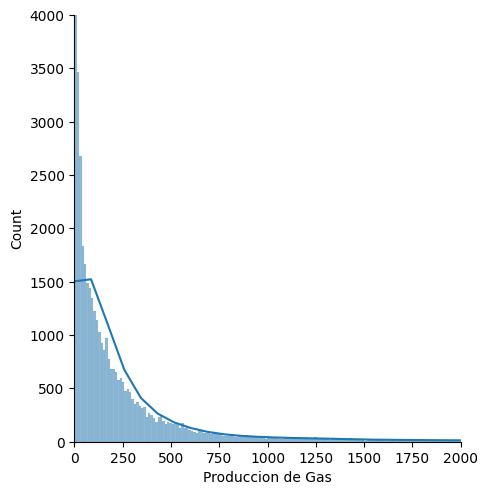

In [ ]:
#El gráfico muestra la frecuencia de los valores de producción de gas, se puede observar que los datos estan sesgados
sns.displot(prod_ypf['Produccion de Gas'], kde=True)
sns.despine()

# Ajustar los límites de los ejes
plt.xlim([0, 2000])
plt.ylim([0, 4000])

# Transformación Logarítmica // Estandarización // Normalización Min-Max



*   Transformación logarítmica (reduce la asimetría)
*   Estandarización (centra los datos en media 0 y desviación estádar 1
*   Normalización (escalamos los datos entre un rango fijo - entre 0 y 1


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Logarítmica (este caso reduce la asimetría en distribuciones muy sesgadas, se utiliza para reducir el impacto de valores extremos. Es ideal antes de estandarizar cuando los datos están muy sesgados)
prod_ypf['petroleo_log'] = np.log1p(prod_ypf['Produccion de Petroleo']*1000)
prod_ypf['gas_log'] = np.log1p(prod_ypf['Produccion de Gas']*1000)

# Estandarización (centra los datos en media 0 y desviación estandar 1, resiste más los outliers que el min max scaler)
std_scaler = StandardScaler()
prod_ypf['petroleo_std'] = std_scaler.fit_transform(prod_ypf[['Produccion de Petroleo']])
prod_ypf['gas_std'] = std_scaler.fit_transform(prod_ypf[['Produccion de Gas']])

# Normalización (escala los datos entre un rango fijo, normalmente entre 0 y 1)
# para este caso no es aconsejable porque el dataset tiene outliers extremos, los comprime todos al mínimo. En sí sirve para datos que están en un rango cerrado sin muchos outliers)
minmax_scaler = MinMaxScaler()
prod_ypf['petroleo_minmax'] = minmax_scaler.fit_transform(prod_ypf[['Produccion de Petroleo']])
prod_ypf['gas_minmax'] = minmax_scaler.fit_transform(prod_ypf[['Produccion de Gas']])

El gráfico presenta cómo se comporta la distribución de la producción de petróleo en su forma original y bajo distintas transformaciones estadísticas. En la vista original (arriba izquierda), se observa una distribución extremadamente sesgada hacia la derecha, con una gran concentración de valores bajos y unos pocos muy altos, lo cual es típico de datos de producción con alta variabilidad entre yacimientos o pozos.

Para tratar esta asimetría, se aplican diferentes transformaciones:

🔹 Transformación Logarítmica (arriba derecha): aplana la cola de la distribución, haciendo que los datos se distribuyan de forma más homogénea y acercándose a una forma más simétrica. Esta técnica es útil cuando se quiere suavizar el impacto de valores extremos.

🔸 Estandarización (StandardScaler) (abajo izquierda): convierte los datos a una escala centrada en cero con desviación estándar uno. Aunque no cambia la forma de la distribución, permite comparar con otras variables estandarizadas en modelos de machine learning.

🟣 Normalización Min-Max (abajo derecha): transforma los valores a un rango entre 0 y 1. Este método es útil cuando los algoritmos de ML requieren escalas similares, aunque no soluciona el sesgo de la distribución.

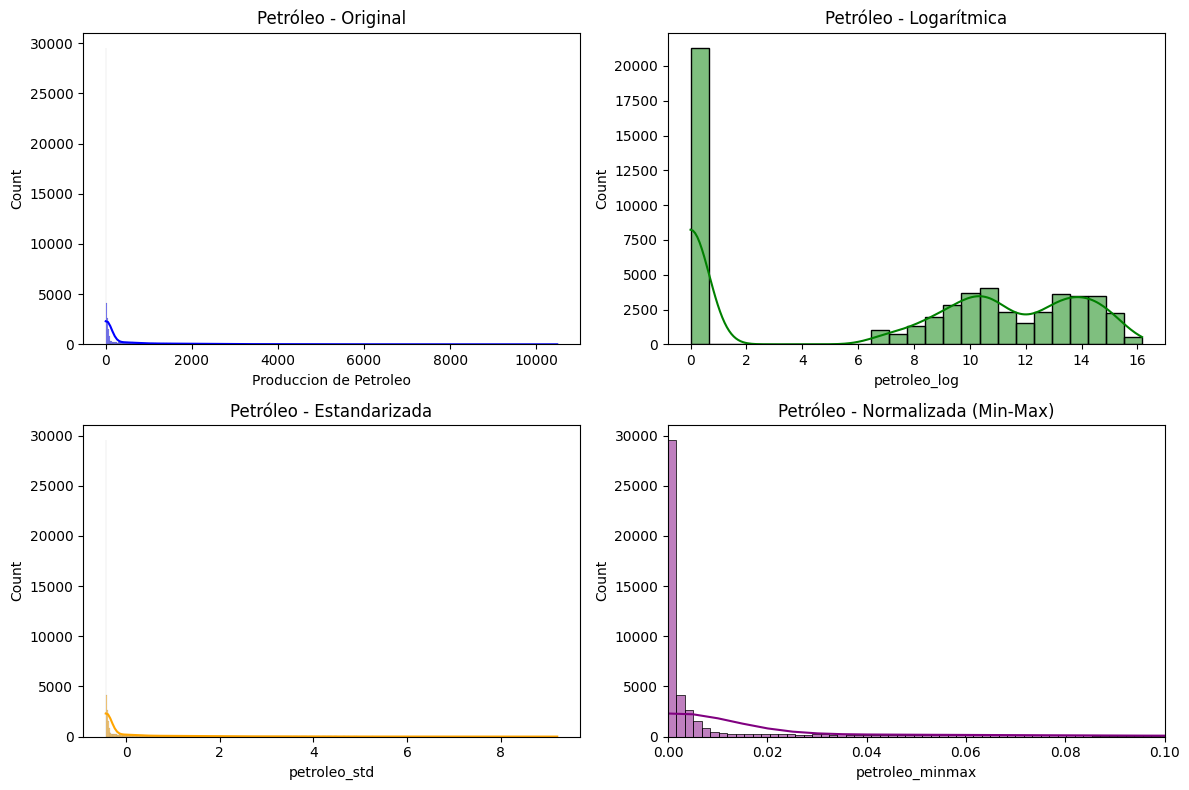

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(prod_ypf['Produccion de Petroleo'], kde=True, ax=axes[0,0], color='blue')
axes[0,0].set_title("Petróleo - Original")

sns.histplot(prod_ypf['petroleo_log'], kde=True, ax=axes[0,1], color='green')
axes[0,1].set_title("Petróleo - Logarítmica")
plt.xlim(0, 0.1)  # o probar con 0.2 o 0.05 según el rango real

sns.histplot(prod_ypf['petroleo_std'], kde=True, ax=axes[1,0], color='orange')
axes[1,0].set_title("Petróleo - Estandarizada")

sns.histplot(prod_ypf['petroleo_minmax'], kde=True, ax=axes[1,1], color='purple')
axes[1,1].set_title("Petróleo - Normalizada (Min-Max)")
plt.xlim(0, 0.1)  # ya aplicado — podrías probar 0.05 para más detalle

plt.tight_layout()
plt.show()

La producción de gas muestra una distribución muy sesgada que puede afectar negativamente el rendimiento de modelos predictivos. La transformación logarítmica es la más efectiva para reducir la asimetría y mejorar la calidad de los datos para análisis posteriores. Las transformaciones por estandarización y min-max son útiles para escalar, pero no abordan la distorsión en la forma de la distribución.

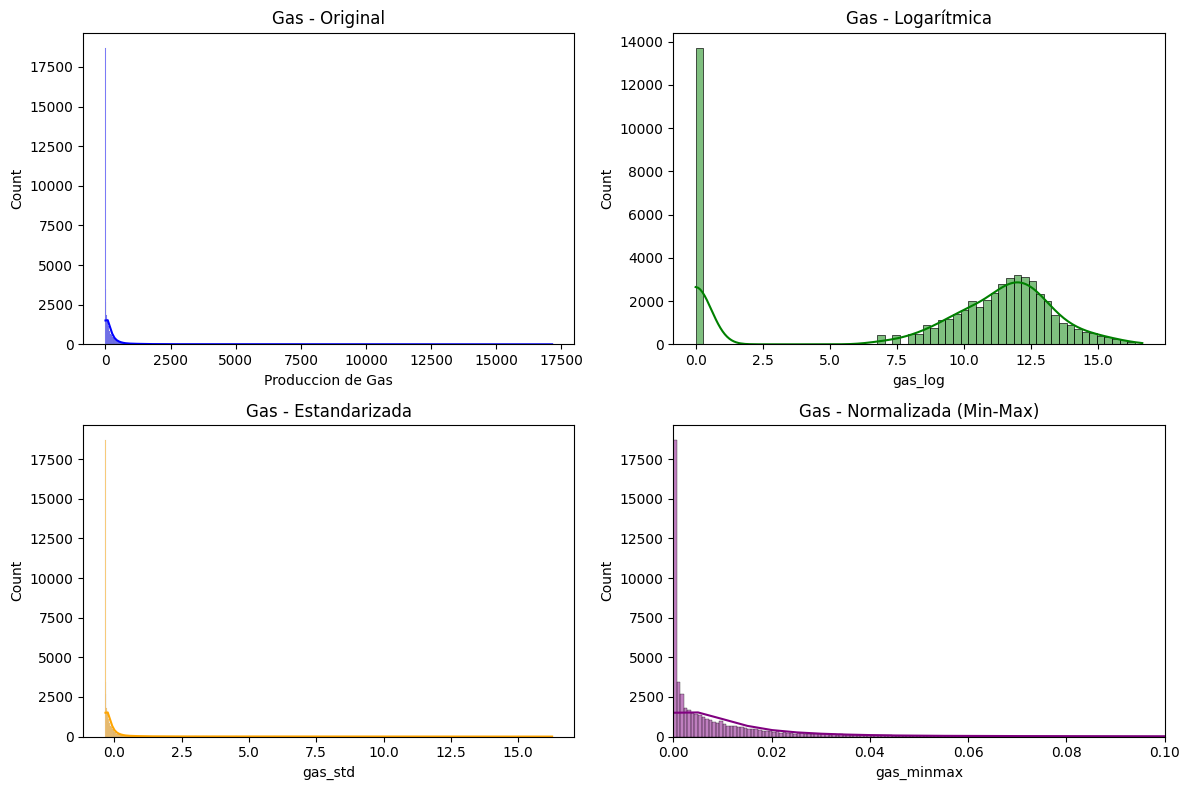

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(prod_ypf['Produccion de Gas'], kde=True, ax=axes[0,0], color='blue')
axes[0,0].set_title("Gas - Original")

sns.histplot(prod_ypf['gas_log'], kde=True, ax=axes[0,1], color='green')
axes[0,1].set_title("Gas - Logarítmica")
plt.xlim(0, 0.1)  # o probar con 0.2 o 0.05 según el rango real

sns.histplot(prod_ypf['gas_std'], kde=True, ax=axes[1,0], color='orange')
axes[1,0].set_title("Gas - Estandarizada")

sns.histplot(prod_ypf['gas_minmax'], kde=True, ax=axes[1,1], color='purple')
axes[1,1].set_title("Gas - Normalizada (Min-Max)")
plt.xlim(0, 0.1)  # ya aplicado — podrías probar 0.05 para más detalle

plt.tight_layout()
plt.show()

### **Z-Score**

In [ ]:
#Se probo realizar el Z-core como herramienta para evaluar los outliers, pero no se obtuvo resultados. Si bien intentamos encontrar el conflicto no obtuvimos un resultado positivo.
z = stats.zscore(np.array(prod_ypf['Produccion de Petroleo']))

In [ ]:
threshold = 500

In [ ]:
z_index = prod_ypf['Produccion de Petroleo'][np.abs(z) < threshold].index
prod_ypf_withzscore = prod_ypf.loc[z_index]

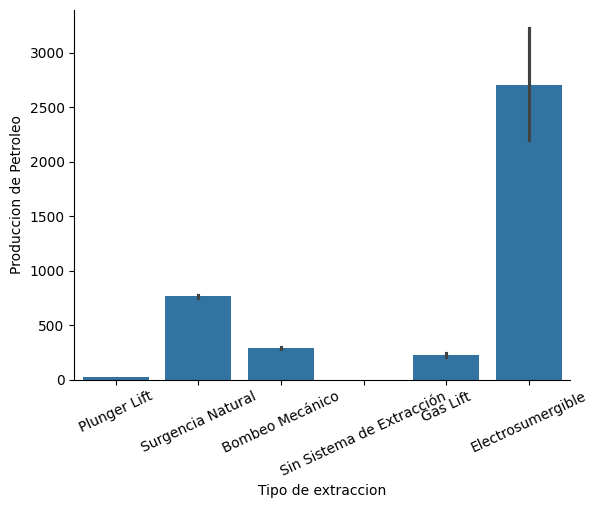

In [ ]:
sns.barplot(x='Tipo de extraccion',y='Produccion de Petroleo',data= prod_ypf_withzscore)
plt.xticks(rotation=25)
sns.despine()

### **Rango Intercuartílico**

In [ ]:
#Rango Intercuartilicos
q1 = prod_ypf['Produccion de Petroleo'].quantile(0.25)
q3 = prod_ypf['Produccion de Petroleo'].quantile(0.75)

In [ ]:
iqr = q3 - q1
lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)

In [ ]:
bf = prod_ypf[(prod_ypf['Produccion de Petroleo'] > lb) & (prod_ypf['Produccion de Petroleo'] < ub)]

In [ ]:
bf.reset_index(drop=True, inplace=True)

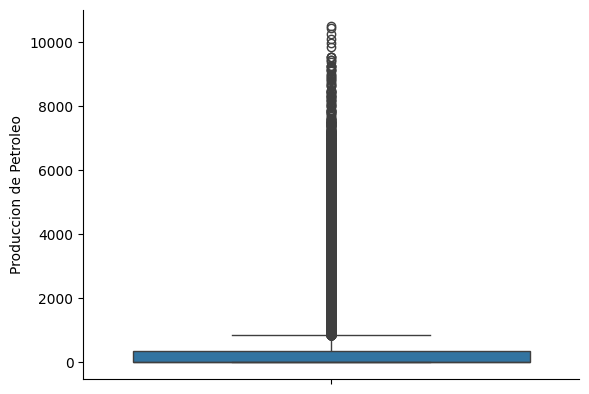

In [ ]:
sns.boxplot(prod_ypf['Produccion de Petroleo'])
sns.despine()

# Transformación de variables

In [ ]:
prod_ypf.head(15)

,Año,Mes,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,...,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso,petroleo_log,gas_log,petroleo_std,gas_std,petroleo_minmax,gas_minmax
8572,2025,1,153522,32,172,0,Plunger Lift,Extracción Efectiva,Gasífero,YPF S.A.,...,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,10.373522,12.055256,-0.407153,-0.164110,0.003051,0.010033
8578,2025,1,156742,0,0,0,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,...,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,0.000000,0.000000,-0.436570,-0.330572,0.000000,0.000000
8584,2025,1,156744,0,0,0,Bombeo Mecánico,En Estudio,Otro tipo,YPF S.A.,...,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,0.000000,0.000000,-0.436570,-0.330572,0.000000,0.000000
8590,2025,1,155827,0,0,0,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,...,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,0.000000,0.000000,-0.436570,-0.330572,0.000000,0.000000
8596,2025,1,156756,55,3,0,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,10.915107,8.006701,-0.386010,-0.327668,0.005244,0.000175
8602,2025,1,159026,0,0,0,Bombeo Mecánico,Parado Transitoriamente,Petrolífero,YPF S.A.,...,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,0.000000,0.000000,-0.436570,-0.330572,0.000000,0.000000
8608,2025,1,161951,1009,178,204,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,13.824471,12.089544,0.490977,-0.158303,0.096196,0.010383
8614,2025,1,137233,0,0,0,Sin Sistema de Extracción,En Espera de Reparación,Otro tipo,YPF S.A.,...,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,0.000000,0.000000,-0.436570,-0.330572,0.000000,0.000000
8620,2025,1,153596,10,22,4,Plunger Lift,Extracción Efectiva,Petrolífero,YPF S.A.,...,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,9.210440,9.998843,-0.427377,-0.309280,0.000953,0.001283
8626,2025,1,158892,656,188,68,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,13.393918,12.144203,0.166474,-0.148625,0.062542,0.010967


In [ ]:
produccion_agrupada = prod_ypf.groupby(
    ['Area de permiso de concesion', 'Tipo de pozo', 'Tipo de recurso','Subtipo de recurso', 'Año', 'Mes'],
    as_index=False
)[['Produccion de Petroleo', 'Produccion de Gas']].sum()

In [ ]:
produccion_agrupada.head(15)

,Area de permiso de concesion,Tipo de pozo,Tipo de recurso,Subtipo de recurso,Año,Mes,Produccion de Petroleo,Produccion de Gas
0,AGUADA DE LA ARENA,Gasífero,NO CONVENCIONAL,SHALE,2023,1,1219,66440
1,AGUADA DE LA ARENA,Gasífero,NO CONVENCIONAL,SHALE,2023,2,1217,77504
2,AGUADA DE LA ARENA,Gasífero,NO CONVENCIONAL,SHALE,2023,3,1250,95092
3,AGUADA DE LA ARENA,Gasífero,NO CONVENCIONAL,SHALE,2023,4,1096,97896
4,AGUADA DE LA ARENA,Gasífero,NO CONVENCIONAL,SHALE,2023,5,1402,100525
5,AGUADA DE LA ARENA,Gasífero,NO CONVENCIONAL,SHALE,2023,6,1277,96758
6,AGUADA DE LA ARENA,Gasífero,NO CONVENCIONAL,SHALE,2023,7,1400,91667
7,AGUADA DE LA ARENA,Gasífero,NO CONVENCIONAL,SHALE,2023,8,1512,84374
8,AGUADA DE LA ARENA,Gasífero,NO CONVENCIONAL,SHALE,2023,9,1151,58053
9,AGUADA DE LA ARENA,Gasífero,NO CONVENCIONAL,SHALE,2023,10,1459,80977


In [ ]:
produccion_agrupada.shape

(1826, 8)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Crear una copia y seleccionar solo las columnas necesarias
produccion_agrupada = produccion_agrupada.copy()
produccion_agrupada = produccion_agrupada[
    ['Produccion de Petroleo','Produccion de Gas', 'Tipo de pozo', 'Tipo de recurso',
     'Subtipo de recurso', 'Area de permiso de concesion','Año','Mes']
]

# Especificar las columnas categóricas
categorical_cols = ['Tipo de pozo',
                    'Tipo de recurso', 'Subtipo de recurso',
                    'Area de permiso de concesion']

# Crear el OneHotEncoder dentro de un ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Transformar los datos
prod_encoded_array = column_transformer.fit_transform(produccion_agrupada)

# Obtener los nombres de las nuevas columnas
encoded_features_names = column_transformer.named_transformers_['encoder'].get_feature_names_out(categorical_cols)

# Crear el DataFrame con las columnas codificadas y numéricas
prod_encoded_df = pd.DataFrame(
    prod_encoded_array,
    columns=list(encoded_features_names) + ['Produccion de Petroleo', 'Produccion de Gas','Año','Mes']
)

In [ ]:
prod_encoded_df.head().astype(int)

,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Año,Mes
0,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1219,66440,2023,1
1,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1217,77504,2023,2
2,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1250,95092,2023,3
3,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1096,97896,2023,4
4,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1402,100525,2023,5


In [ ]:
# prompt: descargar copia del dataframe prod_encoded_df

from google.colab import files
prod_encoded_df.to_csv('prod_encoded_df.csv', index=False)
files.download('prod_encoded_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
prod_encoded_df.columns

Index(['Tipo de pozo_Gasífero', 'Tipo de pozo_Inyección de Agua',
       'Tipo de pozo_Otro tipo', 'Tipo de pozo_Petrolífero',
       'Tipo de pozo_Sumidero', 'Tipo de recurso_NO CONVENCIONAL',
       'Subtipo de recurso_SHALE', 'Subtipo de recurso_TIGHT',
       'Area de permiso de concesion_AGUADA DE LA ARENA',
       'Area de permiso de concesion_AGUADA DEL CHAÑAR',
       'Area de permiso de concesion_AL NORTE DE LA DORSAL',
       'Area de permiso de concesion_BAJO DEL TORO  ',
       'Area de permiso de concesion_BAJO DEL TORO NORTE',
       'Area de permiso de concesion_BANDURRIA SUR',
       'Area de permiso de concesion_CERRO ARENA ',
       'Area de permiso de concesion_CERRO LAS MINAS ',
       'Area de permiso de concesion_CERRO MANRIQUE',
       'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
       'Area de permiso de concesion_CN VII A',
       'Area de permiso de concesion_DADIN',
       'Area de permiso de concesion_EL OREJANO',
       'Area de permiso de c

Re Escalado

En este caso utilizamos MinMaxScaler ya que los datos están dispersos y la distancia entre los mismos es amplia, por lo que podemos dejar los datos dentro de un rango específico.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

(0.0, 4000.0)

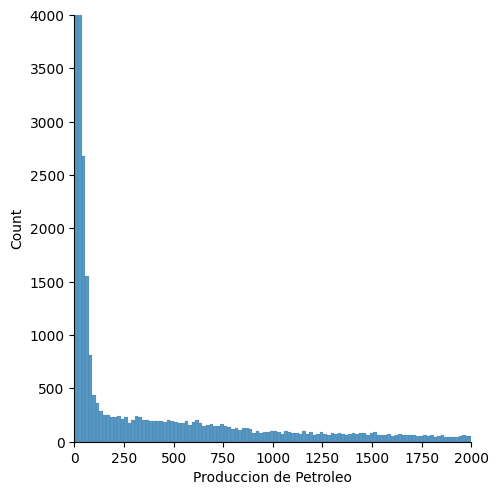

In [ ]:
sns.displot(prod_ypf['Produccion de Petroleo'])

# Ajustar los límites de los ejes
plt.xlim([0, 2000])
plt.ylim([0, 4000])


(0.0, 4000.0)

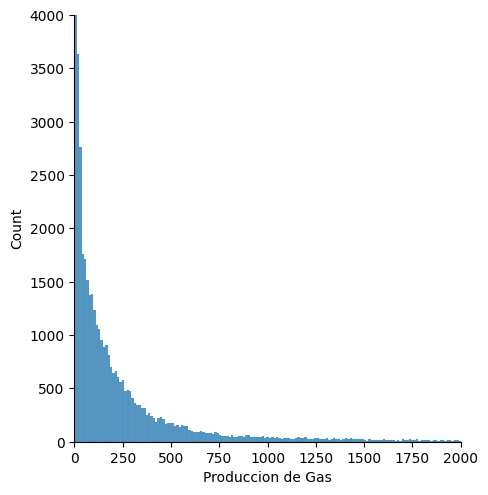

In [ ]:
sns.displot(prod_ypf['Produccion de Gas'])

# Ajustar los límites de los ejes
plt.xlim([0, 2000])
plt.ylim([0, 4000])


In [ ]:
#El rango que elegimos va de 0 a 40 ya que consideramos que es la máxima escala para nuestras categorías según las features utilizadas.
scaler = MinMaxScaler(feature_range=(0, 40), copy=True)

In [ ]:
prod_ypf['Produccion de Petroleo'] = scaler.fit_transform(prod_ypf[['Produccion de Petroleo']])

In [ ]:
prod_ypf.head(15)

,Año,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,Profundidad,...,areayacimiento,Cuenca,Provincia,coordenadax,coordenaday,Tipo de recurso,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso
8572,2025,153522,0.123135,172.10,0.00,3,9,0,YPF S.A.,3844.0,...,18,NEUQUINA,Rio Negro,-67.810843,-39.024083,0,GAS PLUS,EXPLOTACION,DESARROLLO,1
8578,2025,156742,0.000000,0.00,0.00,5,1,2,YPF S.A.,2827.0,...,16,NEUQUINA,Neuquén,-69.179098,-38.009987,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8584,2025,156744,0.000000,0.00,0.00,0,4,2,YPF S.A.,2977.0,...,22,NEUQUINA,Neuquén,-68.748543,-38.176774,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8590,2025,155827,0.000000,0.00,0.00,5,1,2,YPF S.A.,4092.0,...,16,NEUQUINA,Neuquén,-69.200359,-37.958765,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8596,2025,156756,0.213514,3.37,0.00,5,9,3,YPF S.A.,4945.0,...,30,NEUQUINA,Neuquén,-68.678007,-38.329983,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8602,2025,159026,0.000000,0.00,0.00,0,14,3,YPF S.A.,4902.0,...,22,NEUQUINA,Neuquén,-68.748658,-38.176370,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8608,2025,161951,3.850910,178.68,204.18,5,9,3,YPF S.A.,6096.0,...,22,NEUQUINA,Neuquén,-68.654683,-38.278314,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8614,2025,137233,0.000000,0.00,0.00,4,3,2,YPF S.A.,2352.0,...,36,NEUQUINA,Mendoza,-69.620400,-36.206000,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8620,2025,153596,0.039812,22.34,4.04,3,9,3,YPF S.A.,3069.0,...,31,NEUQUINA,Neuquén,-68.917707,-38.318816,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8626,2025,158892,2.504047,188.55,68.97,5,9,3,YPF S.A.,5065.0,...,3,NEUQUINA,Neuquén,-68.685679,-38.327307,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0


In [ ]:
prod_ypf['Produccion de Petroleo'].describe()

,Produccion de Petroleo
count,56418.000000
mean,1.812248
std,4.148629
min,0.000000
25%,0.000000
50%,0.052396
75%,1.312152
max,40.000000


(0.0, 200.0)

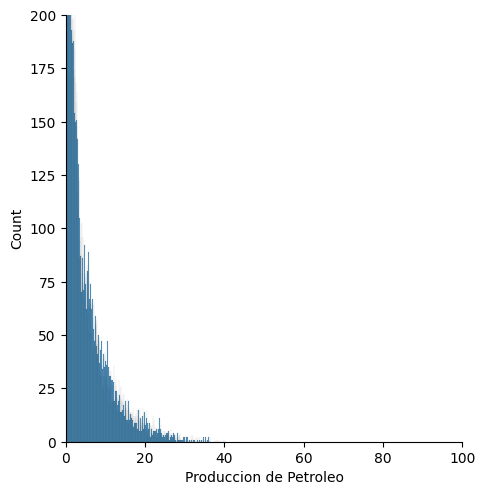

In [ ]:
sns.displot(prod_ypf['Produccion de Petroleo'])

# Ajustar los límites de los ejes
plt.xlim([0, 100])
plt.ylim([0, 200])

In [ ]:
#El rango que elegimos va de 0 a 40 ya que consideramos que es la máxima escala para nuestras categorías según las features utilizadas.
scaler = MinMaxScaler(feature_range=(0, 40), copy=True)

In [ ]:
prod_ypf['Produccion de Gas'] = scaler.fit_transform(prod_ypf[['Produccion de Gas']])

In [ ]:
prod_ypf.head(15)

,Año,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,Profundidad,...,areayacimiento,Cuenca,Provincia,coordenadax,coordenaday,Tipo de recurso,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso
8572,2025,153522,0.123135,0.401562,0.00,3,9,0,YPF S.A.,3844.0,...,18,NEUQUINA,Rio Negro,-67.810843,-39.024083,0,GAS PLUS,EXPLOTACION,DESARROLLO,1
8578,2025,156742,0.000000,0.000000,0.00,5,1,2,YPF S.A.,2827.0,...,16,NEUQUINA,Neuquén,-69.179098,-38.009987,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8584,2025,156744,0.000000,0.000000,0.00,0,4,2,YPF S.A.,2977.0,...,22,NEUQUINA,Neuquén,-68.748543,-38.176774,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8590,2025,155827,0.000000,0.000000,0.00,5,1,2,YPF S.A.,4092.0,...,16,NEUQUINA,Neuquén,-69.200359,-37.958765,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8596,2025,156756,0.213514,0.007863,0.00,5,9,3,YPF S.A.,4945.0,...,30,NEUQUINA,Neuquén,-68.678007,-38.329983,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8602,2025,159026,0.000000,0.000000,0.00,0,14,3,YPF S.A.,4902.0,...,22,NEUQUINA,Neuquén,-68.748658,-38.176370,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8608,2025,161951,3.850910,0.416915,204.18,5,9,3,YPF S.A.,6096.0,...,22,NEUQUINA,Neuquén,-68.654683,-38.278314,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8614,2025,137233,0.000000,0.000000,0.00,4,3,2,YPF S.A.,2352.0,...,36,NEUQUINA,Mendoza,-69.620400,-36.206000,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8620,2025,153596,0.039812,0.052126,4.04,3,9,3,YPF S.A.,3069.0,...,31,NEUQUINA,Neuquén,-68.917707,-38.318816,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8626,2025,158892,2.504047,0.439945,68.97,5,9,3,YPF S.A.,5065.0,...,3,NEUQUINA,Neuquén,-68.685679,-38.327307,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0


In [ ]:
prod_ypf['Produccion de Gas'].describe()

,Produccion de Gas
count,56418.000000
mean,0.797867
std,2.411041
min,0.000000
25%,0.004037
50%,0.141900
75%,0.553821
max,40.000000


(0.0, 200.0)

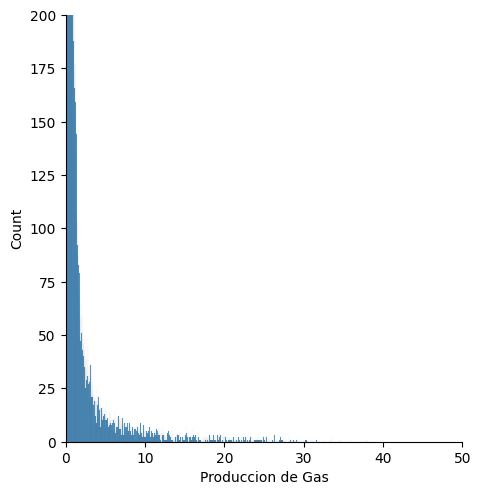

In [ ]:
sns.displot(prod_ypf['Produccion de Gas'])

# Ajustar los límites de los ejes
plt.xlim([0, 50])
plt.ylim([0, 200])

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Asegurate que las coordenadas estén en float y no tengan NaN
prod_ypf_clean = prod_ypf.dropna(subset=['coordenadax', 'coordenaday']).copy()

# Crear geometría (Point)
geometry = [Point(xy) for xy in zip(prod_ypf_clean['coordenadax'], prod_ypf_clean['coordenaday'])]

# Crear GeoDataFrame
gdf = gpd.GeoDataFrame(prod_ypf_clean, geometry=geometry)

# Definir sistema de coordenadas (CRS)
# Si las coordenadas están en WGS84 (lat/lon), usá EPSG:4326
# Si están en metros, por ejemplo UTM zona 20 sur: EPSG:32720
gdf.set_crs(epsg=4326, inplace=True)  # ← Ajustá si corresponde

,Año,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,Profundidad,...,Cuenca,Provincia,coordenadax,coordenaday,Tipo de recurso,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso,geometry
8572,2025,153522,32,172,0,Plunger Lift,Extracción Efectiva,Gasífero,YPF S.A.,3844,...,NEUQUINA,Rio Negro,-67.810843,-39.024083,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,POINT (-67.81084 -39.02408)
8578,2025,156742,0,0,0,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,2827,...,NEUQUINA,Neuquén,-69.179098,-38.009987,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,POINT (-69.1791 -38.00999)
8584,2025,156744,0,0,0,Bombeo Mecánico,En Estudio,Otro tipo,YPF S.A.,2977,...,NEUQUINA,Neuquén,-68.748543,-38.176774,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,POINT (-68.74854 -38.17677)
8590,2025,155827,0,0,0,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,4092,...,NEUQUINA,Neuquén,-69.200359,-37.958765,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,POINT (-69.20036 -37.95876)
8596,2025,156756,55,3,0,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,4945,...,NEUQUINA,Neuquén,-68.678007,-38.329983,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,POINT (-68.67801 -38.32998)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199438,2024,166128,0,0,0,Sin Sistema de Extracción,En Inyección Efectiva,Sumidero,YPF S.A.,2046,...,NEUQUINA,Neuquén,-68.525949,-38.122077,NO CONVENCIONAL,Sin Proyecto,SERVICIO,CONTROL,SHALE,POINT (-68.52595 -38.12208)
199440,2024,166126,1642,101,1102,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,5889,...,NEUQUINA,Neuquén,-68.558082,-38.076855,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,POINT (-68.55808 -38.07685)
199442,2024,166127,2441,153,1287,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,0,...,NEUQUINA,Neuquén,-68.558013,-38.076854,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,POINT (-68.55801 -38.07685)
199446,2024,166133,0,0,0,Surgencia Natural,Parado Transitoriamente,Gasífero,YPF S.A.,4491,...,NEUQUINA,Neuquén,-69.335181,-38.710951,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,POINT (-69.33518 -38.71095)


In [ ]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 49.8 MB/s eta 0:00:00


In [ ]:
print(gdf.columns)

Index(['Año', 'ID pozo', 'Produccion de Petroleo', 'Produccion de Gas',
       'Produccion de agua', 'Tipo de extraccion', 'Tipo de estado',
       'Tipo de pozo', 'Empresa', 'Profundidad',
       'Area de permiso de concesion', 'areayacimiento', 'Cuenca', 'Provincia',
       'coordenadax', 'coordenaday', 'Tipo de recurso', 'Proyecto',
       'Clasificacion', 'Subclasificacion', 'Subtipo de recurso', 'geometry'],
      dtype='object')


In [ ]:
print(gdf.dtypes)

Año                                int64
ID pozo                            int64
Produccion de Petroleo             int64
Produccion de Gas                  int64
Produccion de agua                 int64
Tipo de extraccion                object
Tipo de estado                    object
Tipo de pozo                      object
Empresa                           object
Profundidad                        int64
Area de permiso de concesion      object
areayacimiento                    object
Cuenca                            object
Provincia                         object
coordenadax                      float64
coordenaday                      float64
Tipo de recurso                   object
Proyecto                          object
Clasificacion                     object
Subclasificacion                  object
Subtipo de recurso                object
geometry                        geometry
dtype: object


Los siguientes gráficos permiten visualizar la ubicación de la producción de petróleo y gas por parte de YPF en estos últimos años en Vaca Muerta, como habíamos mencionado anteriormente la mayor producción se concentra en el área de yacimiento Loma Campana.

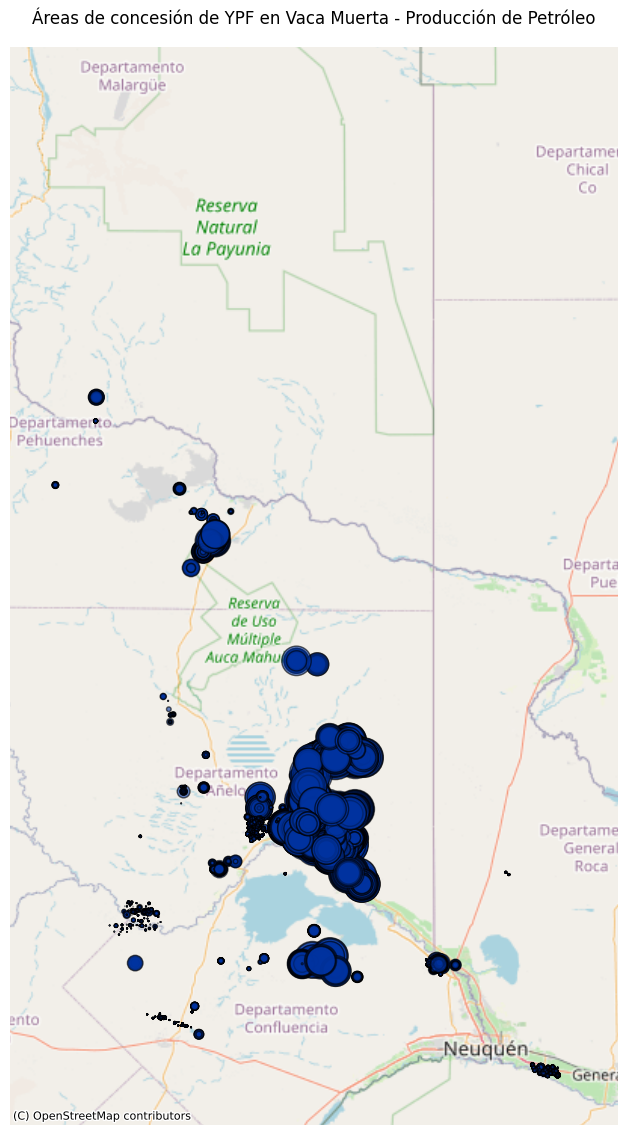

In [ ]:
import contextily as ctx
import matplotlib.pyplot as plt

# Buscamos reproyectar a Web Mercator (para que se alinee con los mapas base)
# Web Mercator (EPSG:3857) es un sistema de proyección cartográfica ampliamente utilizado en mapas web como contextily en Python
gdf = gdf.to_crs(epsg=3857)

# Escalar tamaño de burbujas
gdf['scaled_area'] = gdf['Produccion de Petroleo'].astype(float)
gdf['scaled_area'] = gdf['scaled_area'] / gdf['scaled_area'].max() * 1000

# Plot
fig, ax = plt.subplots(figsize=(16, 14))

gdf.plot(
    ax=ax,
    markersize=gdf['scaled_area'],
    alpha=0.6,
    color='#0033A0',
    edgecolor='k'
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Fondo tipo mapa
ax.set_axis_off()
plt.title('Áreas de concesión de YPF en Vaca Muerta - Producción de Petróleo')
plt.show()

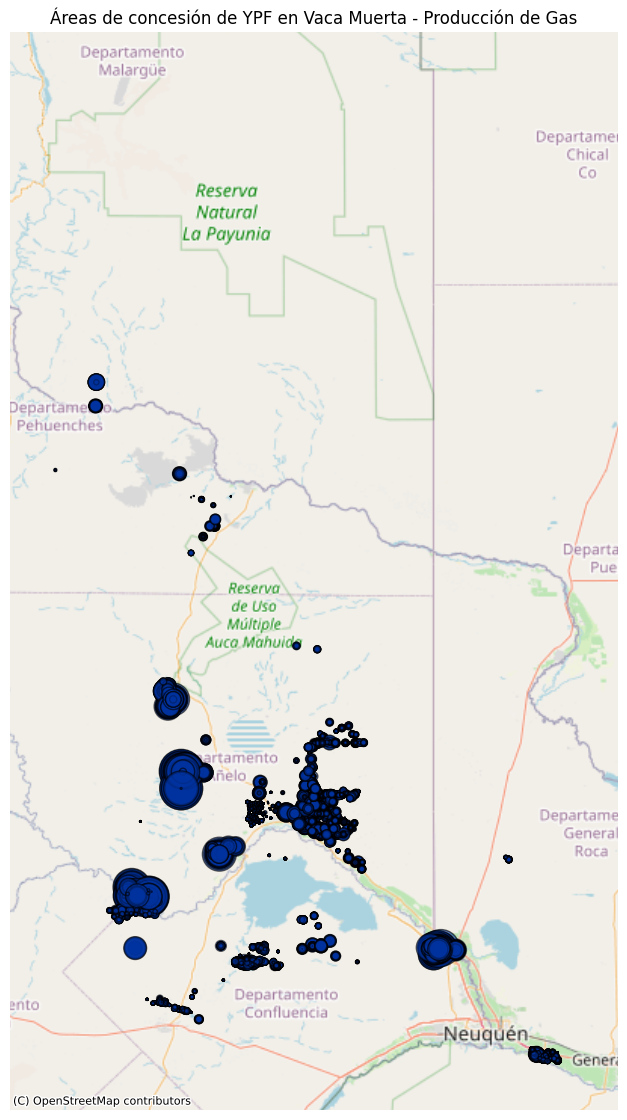

In [ ]:
import contextily as ctx
import matplotlib.pyplot as plt

# Reproyectar a Web Mercator (para que se alinee con los mapas base)
gdf = gdf.to_crs(epsg=3857)

# Escalar tamaño de burbujas
gdf['scaled_area'] = gdf['Produccion de Gas'].astype(float)
gdf['scaled_area'] = gdf['scaled_area'] / gdf['scaled_area'].max() * 1000

# Plot
fig, ax = plt.subplots(figsize=(16, 14))

gdf.plot(
    ax=ax,
    markersize=gdf['scaled_area'],
    alpha=0.6,
    color='#0033A0',
    edgecolor='k'
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Fondo tipo mapa
ax.set_axis_off()
plt.title('Áreas de concesión de YPF en Vaca Muerta - Producción de Gas')
plt.show()